In [1]:
# Import necessary libraries
import os, sys
import numpy as np
import pandas as pd
import itertools
from collections import defaultdict
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Inits

In [2]:
# Get the current working directory
base_dir = os.getcwd()
plots_folder = 'plots'

# Load functions from other notebooks
helpers_file = os.path.join(base_dir, 'helpers.ipynb')
%run $helpers_file

current_module = sys.modules[__name__]

class Strategies:
    """
    A class representing different strategies for counterfactual explanation generation.

    Attributes:
    - stypes (list): List of strategy types, including 'random', 'brute_force', 'bfs_yloss', 'bidirectional', and 'combo'.
    """
    stypes = [
        'random',
        'brute_force',
        'bfs_yloss',
        'bidirectional',
        'combo',
    ]

# Movielens 10M

## Load data

In [9]:
## uncomment the following lines if you want to run the various strategies in budget_strategies
implemented_strategies = os.path.join(base_dir, 'clean_budget_strategies.ipynb')
%run $implemented_strategies

# Restore relevant variables from other notebooks

%store -r random_cfs
%store -r brute_force_cfs
%store -r bfs_yloss_cfs
# %store -r dfs_yloss_cfs
# %store -r bestfs_yloss_cfs
%store -r bidirectional_cfs
%store -r combo_cfs

  0%|          | 0/6040 [00:00<?, ?it/s]

target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: Random


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [02:56,  8.80s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [05:53, 12.54s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [08:51, 14.49s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [11:49, 17.74s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'random_cfs' (list)
The backend used is: BFS


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [00:04,  4.28it/s]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [00:10,  2.59it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [00:15,  2.43it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [00:20,  1.99it/s]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: BFS


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [00:04,  4.32it/s]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [00:10,  2.60it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [00:15,  2.45it/s]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [00:19,  2.01it/s]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'bfs_yloss_cfs' (list)
The backend used is: BiDirectional


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [04:30, 13.52s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [09:01, 19.20s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [13:35, 22.25s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [18:03, 27.09s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: BiDirectional


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [04:30, 13.50s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [09:02, 19.21s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [13:35, 22.25s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [18:03, 27.08s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: BiDirectional


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [04:00, 12.00s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [07:58, 16.92s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [11:57, 19.52s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [15:50, 23.77s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'bidirectional_cfs' (list)
The backend used is: BruteForce


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [1:43:01, 309.09s/it]           

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [5:58:22, 818.68s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [13:37:07, 1540.26s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [27:29:51, 2474.80s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'brute_force_cfs' (list)
The backend used is: BruteForce


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [00:10,  1.93it/s]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [00:39,  1.51s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [01:27,  2.75s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [02:44,  4.11s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

Stored 'brute_force_cfs_low_budget' (list)
The backend used is: Combo


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [04:30, 13.54s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [09:06, 19.40s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [13:43, 22.47s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [18:16, 27.41s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: Combo


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [04:30, 13.52s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [09:06, 19.39s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [13:42, 22.46s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [18:16, 27.42s/it]
target position loop:   0%|          | 0/4 [00:00<?, ?it/s]

The backend used is: Combo


users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 20it [04:03, 12.18s/it]              

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 30it [08:03, 17.11s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [12:06, 19.78s/it]

users loop:   0%|          | 0/500 [00:00<?, ?it/s]

target position loop: 40it [16:08, 24.20s/it]


Stored 'combo_cfs' (list)


## Save/retrieve data experiment if necessary

In [10]:
import pickle

base_dir = os.getcwd()
pkl_dir = os.path.join(base_dir, 'pkl/')


In [11]:
# Uncomment these lines to save the object from the budget strategies notebook in the pkl folder
# with open(os.path.join(pkl_dir,'random_cfs.pkl'), 'wb') as f:
#     pickle.dump(random_cfs, f)
    
# with open(os.path.join(pkl_dir,'brute_force_cfs.pkl'), 'wb') as f:
#     pickle.dump(brute_force_cfs, f)

# with open(os.path.join(pkl_dir,'bfs_yloss_cfs.pkl'), 'wb') as f:
#     pickle.dump(bfs_yloss_cfs, f)

# with open(os.path.join(pkl_dir,'bidirectional_cfs.pkl'), 'wb') as f:
#     pickle.dump(bidirectional_cfs, f)

# with open(os.path.join(pkl_dir,'combo_cfs.pkl'), 'wb') as f:
#     pickle.dump(combo_cfs, f)

In [4]:
# Uncomment these lines to load the object stored as pkl in the pkl folder
with open(os.path.join(pkl_dir,'random_cfs.pkl'), 'rb') as f:
    random_cfs = pickle.load(f)
    
with open(os.path.join(pkl_dir,'brute_force_cfs.pkl'), 'rb') as f:
    brute_force_cfs = pickle.load(f)
    
with open(os.path.join(pkl_dir,'bfs_yloss_cfs.pkl'), 'rb') as f:
    bfs_yloss_cfs = pickle.load(f)
    
with open(os.path.join(pkl_dir,'bidirectional_cfs.pkl'), 'rb') as f:
    bidirectional_cfs = pickle.load(f)
    
with open(os.path.join(pkl_dir,'combo_cfs.pkl'), 'rb') as f:
    combo_cfs = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Vince\\OneDrive\\Documents\\ULB\\ma2\\MEMO-F423\\final_thesis\\Thesis\\previous_work\\notebooks\\pkl/random_cfs.pkl'

# Tests to ensure the quality of the code

These experiments are based on a CSV file called "pooling_brute_force_evaluation_cfs.csv", if this one is not in the csv subfolder or if you want to generate it again, please see the clean_budget_strategies.ipynb file and uncomment the line which is in the first cell of the "run implemented strategies" section

### Evaluation of the sampling methods used to answer "why-not" questions

In [ ]:
# The result is stored in the evaluate_sampling_jaccard_result.csv file. You can find it in the subfolder csv/evaluation_sampling_method.
counter_jacc = evaluate_sampling_method("pooling_brute_force_evaluation_cfs.csv", pretrained_models['pooling'], test, get_backend_strategy("brute_force"), 20, jaccard_sims_matrix, 10)

# The result is stored in the evaluate_sampling_rs_result.csv file. You can find it in the subfolder csv/evaluation_sampling_method.
counter_rs = evaluate_sampling_method("pooling_brute_force_evaluation_cfs.csv", pretrained_models['pooling'], test, get_backend_strategy("brute_force"), 20, jaccard_sims_matrix, 10, sampling_method="rs")

print("counter for jaccard :", counter_jacc)
print("counter for rs :", counter_rs)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

files_to_read = [
    ("evaluate_sampling_rs_result.csv","RS"),
    ("evaluate_sampling_jaccard_result.csv", "Jaccard")
]

directory = "./csv/evaluation_sampling_method/"

for file_name, graph_name in files_to_read:
    file_path = directory + file_name 
    # Load CSV file in a dataframe
    df = pd.read_csv(file_path)

    # Count occurrences of each category and ensure all categories 0, 1, 2, 3 are present
    category_counts = df['category'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

    # Split categories into successes and failures
    success_counts = category_counts.loc[0:2].sum()  # Sum of categories 0 to 2
    failure_count = category_counts.loc[3]  # Category 3 represents failures

    # Prepare data for the plot
    categories = ["Success", "Failure"]
    counts = [success_counts, failure_count]

    colors = ['green', 'red']

    fig, ax = plt.subplots()

    bottom = 0
    for i in range(3):
        if category_counts[i] > 0:  
            ax.bar('Success', category_counts[i], bottom=bottom, color=colors[0], label=f'Case {i}' if bottom == 0 else "")
            bottom += category_counts[i]

    if failure_count > 0: 
        ax.bar("Failure", failure_count, color=colors[1], label="Failure")

    plt.title(f"Success and failure repartition for the {graph_name} sampling method")
    plt.xlabel("Category")
    plt.ylabel("Occurency")

    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.savefig(os.path.join(plots_folder, f"eval_{graph_name}_sampling.pdf"), dpi=300)
    plt.show()


### Evaluation of the search strategies implemented used to answer "why-not" questions

In [ ]:
counter_random = evaluate_reverse_mode("pooling_brute_force_evaluation_cfs.csv", "random", pretrained_models['pooling'], test,  get_backend_strategy("random"), 1000, 20, jaccard_sims_matrix, 10)
counter_brute_force = evaluate_reverse_mode("pooling_brute_force_evaluation_cfs.csv", "brute_force", pretrained_models['pooling'], test,  get_backend_strategy("brute_force"), 1000, 20, jaccard_sims_matrix, 10)
counter_bfs = evaluate_reverse_mode("pooling_brute_force_evaluation_cfs.csv", "bfs", pretrained_models['pooling'], test,  get_backend_strategy("bfs"), 1000, 20, jaccard_sims_matrix, 10)
counter_bidirectional = evaluate_reverse_mode("pooling_brute_force_evaluation_cfs.csv", "bidirectional", pretrained_models['pooling'], test,  get_backend_strategy("bidirectional"), 1000, 20, jaccard_sims_matrix, 10)
counter_combo = evaluate_reverse_mode("pooling_brute_force_evaluation_cfs.csv", "combo", pretrained_models['pooling'], test,  get_backend_strategy("combo"), 1000, 20, jaccard_sims_matrix, 10)

print("counter for random strategy :", counter_random)
print("counter for brute_force strategy :", counter_brute_force)
print("counter for bfs strategy :", counter_bfs)
print("counter for bidirectional strategy :", counter_bidirectional)
print("counter for combo strategy :", counter_combo)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of files to read with their associated graph names
files_to_read = [
    ("random_result.csv","random"),
    ("brute_force_result.csv","brute_force"),
    ("bfs_result.csv","bfs"),
    ("bidirectional_result.csv","bidirectional"),
    ("combo_result.csv","combo"),
]

# Directory containing the CSV files
directory = "./csv/evaluation_reverse_mode/"
plots_folder = "./plots/"

for file_name, graph_name in files_to_read:
    file_path = directory + file_name 
    # Load CSV file into a dataframe
    df = pd.read_csv(file_path)

    # Count occurrences of each category and ensure all categories 0, 1, 2, 3 are present
    category_counts = df['same_interactions'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

    # Split categories into successes and failures
    success_counts = category_counts.loc[0:2].sum()  # Sum of categories 0 to 2
    failure_count = category_counts.loc[3]  # Category 3 represents failures

    # Prepare data for the plot
    categories = ["Success", "Failure"]
    counts = [success_counts, failure_count]

    # Colors for the bars
    colors = ['green', 'red']

    # Create a plot
    fig, ax = plt.subplots()

    # Create stacked bars for successes
    bottom = 0
    for i in range(3):
        if category_counts[i] > 0:  # Check if category i has occurrences
            ax.bar('Success', category_counts[i], bottom=bottom, color=colors[0], label=f'Case {i}' if bottom == 0 else "")
            bottom += category_counts[i]

    # Add a bar for failures
    if failure_count > 0:  # Check if category 3 has occurrences
        ax.bar("Failure", failure_count, color=colors[1], label="Failure")

    # Add title and axis labels
    plt.title(f"Success and failure repartition for the {graph_name} search strategy")
    plt.xlabel("Category")
    plt.ylabel("Occurrence")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Save the plot
    plt.savefig(os.path.join(plots_folder, f"eval_{graph_name}.pdf"), dpi=300)
    
    # Show the plot
    plt.show()


## Prepare data

In [50]:
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)
strs_prefix = ''
missing_target_in_topk = True

for i in range(1):
    # Convert results to lists for each strategy
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[0]}_cfs')[i],
        cnt, no_target_achieved_cases, f'random_{i}', missing_target_in_topk)
    
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[1]}_cfs_low_budget')[i],
        cnt, no_target_achieved_cases, f'brute_force_{i}', missing_target_in_topk)

    #This part of the code has been commented because there is still a bug in the bfs strategy

    # cnt, no_target_achieved_cases = convert_res_to_lists(
        # getattr(current_module, f'{strs_prefix}{Strategies.stypes[2]}_cfs')[i + 1],
        # cnt, no_target_achieved_cases, f'bfs_{i}', missing_target_in_topk)

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bidirectional_001_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'bidirectional_5_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'bidirectional_999_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i],
        cnt, no_target_achieved_cases, f'combo_001_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'combo_5_{i}', missing_target_in_topk)
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'combo_999_{i}', missing_target_in_topk)

AttributeError: module '__main__' has no attribute 'brute_force_low_budget_cfs'

In [37]:
# Define a list of counterfactual methods supported
# methods_supported = ['Brute_Force', 'Random', 'BFS'] + \
#     [f'BiDirectional_{m}' for m in ['001', '5', '999']] + \
#     [f'Combo_{m}' for m in ['001', '5', '999']]
methods_supported = ['Brute_Force', 'Random'] + \
    [f'BiDirectional_{m}' for m in ['001', '5', '999']] + \
    [f'Combo_{m}' for m in ['001', '5', '999']]

#it is at this index that starts and ends the stats_per_cardinality storing
custom_range = [9, 29] 

# Get the target positions from the keys of the 'cnt' dictionary
target_pos = list(cnt.keys())

# Define column names for the resulting DataFrame
cnames = ['user_id', 'method', 'pos', 'budget', 'init_budget', 'best_budget', 'cardinality', 'cfs_orig', 'cfs']

rows, cols = 5, 1

# Initialize an empty list to store several DataFrames
tmp_dfs = []

for col in range(cols):
    for pos, row in zip(target_pos, range(rows)):
        tmp_dfs.append( 
            # Constructs a DataFrame from a list of records.
            pd.DataFrame.from_records(
                list(
                    itertools.chain(
                        *(
                            zip(
                                v[6], itertools.repeat(k), itertools.repeat(pos), v[i], v[2], v[3], 
                                itertools.repeat(i - custom_range[0] + 1), v[7], v[8]
                            )
                            for k, v in cnt[pos].items() if f'_{col}' in k and k.rsplit('_', 1)[0] in map(lambda x: x.lower(), methods_supported)
                            for i in range(custom_range[0], custom_range[1])
                        )
                    )
                ), columns=cnames
            )
        )

df = pd.concat(tmp_dfs, ignore_index=True)

    user_id    method  pos  budget  init_budget  best_budget  cardinality  \
0         5  random_0   11       0          138          240            1   
1         8  random_0   11       0           12          416            1   
2         9  random_0   11       0           15          204            1   
3        10  random_0   11       0           39           82            1   
4        11  random_0   11       0           76           76            1   
5        15  random_0   11       0          909          909            1   
6        17  random_0   11       0         1000         1000            1   
7        18  random_0   11       0            2          959            1   
8        19  random_0   11       0           13          750            1   
9        22  random_0   11       0            3          847            1   
10       23  random_0   11       0           29          765            1   
11       24  random_0   11       0           34          852            1   

In [38]:
# Creates a boolean Series (idx) indicating which rows are duplicates based on the conditions specified
idx = df.loc[(df['cfs_orig'] == df['cfs'])].duplicated(subset=['user_id', 'method', 'pos'], keep='last')

# This line updates the 'budget' column for rows where 'cfs_orig' is equal to 'cfs' and are not duplicate with the values from the 'best_budget' column
df.loc[(df['cfs_orig'] == df['cfs']) & ~idx, ['budget']] = df.loc[(df['cfs_orig'] == df['cfs']) & ~idx]['best_budget']

In [39]:
'''Create dataframes for the plots'''

# 1st plot: %users per card

# Calculates the total number of unique users
all_users = df['user_id'].nunique()

res = []

# Loop for the cardinality
for i in range(1, 21):
    res.append(df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)] # maybe bug
               .groupby(['method', 'pos'], sort=False)[['user_id', 'cfs']]
               .nunique()
               .reset_index())

ddf = pd.concat(res, ignore_index=True)
ddf['%users'] = (ddf['user_id'] / all_users) * 100

# 2nd plot: average budget


init_budget = 100
end_budget = 1001
step_budget = 100

# Initialize an empty list to store aggregated results
res = []

# Iterate over a range of budget thresholds
for b in range(init_budget, end_budget, step_budget):
    # Filter DataFrame based on budget and best_budget conditions
    filtered_df = df[(df['budget'] > 0) & (df['best_budget'] < b)]
    
    # Group by 'method' and 'pos', calculate mean of 'cfs' and number of unique users
    aggregated = filtered_df.groupby(['method', 'pos'], sort=False)\
        .agg(card_mean=('cfs', 'mean'), no_users=('user_id', 'nunique'))\
        .reset_index()
    
    # Add a new column 'budget_thres' with the current budget threshold
    aggregated['budget_thres'] = b
    
    # Add a new column 'max_users' with the maximum number of users for each 'pos'
    aggregated['max_users'] = aggregated.groupby(['pos'])['no_users'].transform(max)
    
    # Append the aggregated DataFrame to the list
    res.append(aggregated)

# Concatenate all DataFrames in the list into a single DataFrame
ddf2 = pd.concat(res, ignore_index=True)

# Calculate the percentage of users based on the total number of users
ddf2['%users'] = (ddf2['no_users'] / all_users) * 100
ddf2['combined_means'] = ddf2['card_mean']


# 3rd plot :

def aggf(data):
    # For each user, select the data rows where the user's budget is at its maximum.
    # By doing so, the resulting DataFrame will contain, for each user, only those records 
    # where he spent his highest budget.
    users_grouping = data.groupby(['user_id']).apply(
        lambda d: d.loc[d['budget'] == d['budget'].max()]
    )

    # Calculate the mean budget and count of users for the group
    return pd.Series(
        [users_grouping['budget'].mean(),
         users_grouping['user_id'].count()],
        ['avg_budget', 'no_users']
    )

# Initialize an empty list to store aggregated results
res = []

# Iterate over a range of cardinalities in descending order
for i in range(5, 0, -1):
    # Filter DataFrame based on budget, cardinality, and best_budget conditions
    filtered_df = df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]
    
    # Group by 'method' and 'pos', apply custom aggregation function
    aggregated = filtered_df.groupby(['method', 'pos'], sort=False)\
        .apply(aggf)\
        .reset_index()
    
    # Add a new column 'cardinality' with the current cardinality
    aggregated['cardinality'] = i
    
    # Append the aggregated DataFrame to the list
    res.append(aggregated)

# Concatenate all DataFrames in the list into a single DataFrame
ddf3 = pd.concat(res, ignore_index=True)

# Calculate the percentage of users based on the total number of users
ddf3['%users'] = (ddf3['no_users'] / all_users) * 100


## Plots

In [40]:
import matplotlib.ticker as mticker


sns.set_theme(style="ticks", font_scale=1.5, )

# Create an array with the colors you want to use
colors = ['black', 'darkred', 'green', 'darkblue', 'dodgerblue', 'darkturquoise', 'darkgoldenrod', 'orange', 'chocolate']

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

#This part of the code has been adapted to not consider BFS strategy
# custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
# custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]
custom_markers = ['o', 'v', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

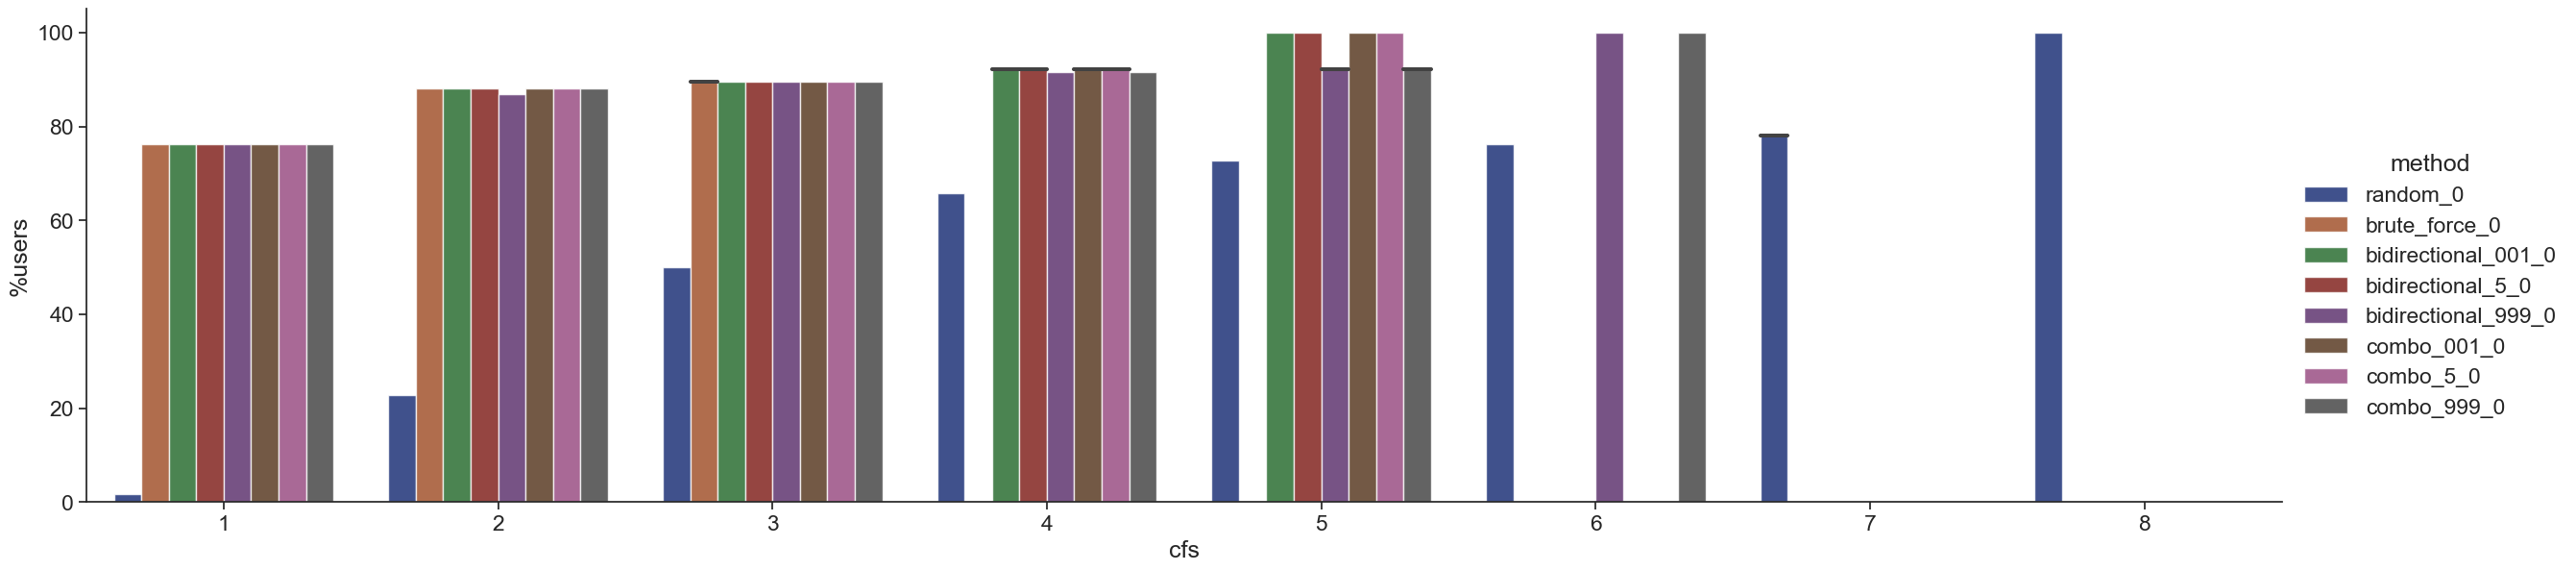

In [41]:
a4_dims = (11.7, 8.27)

g = sns.catplot(
    data=ddf[(ddf['pos'] == 13)],  # Filter data for a specific position
    kind="bar",  # Type of plot
    x="cfs",  # X-axis variable
    y="%users",  # Y-axis variable
    hue="method",  # Variable for color differentiation
    ci="sd",  # Confidence interval for error bars
    capsize=0.1,  # Size of the caps on error bars
    palette="dark",  # Color palette to use
    alpha=.8,  # Transparency of bars
    height=6,  # Height of the plot
    aspect=4,  # Aspect ratio of the plot
)

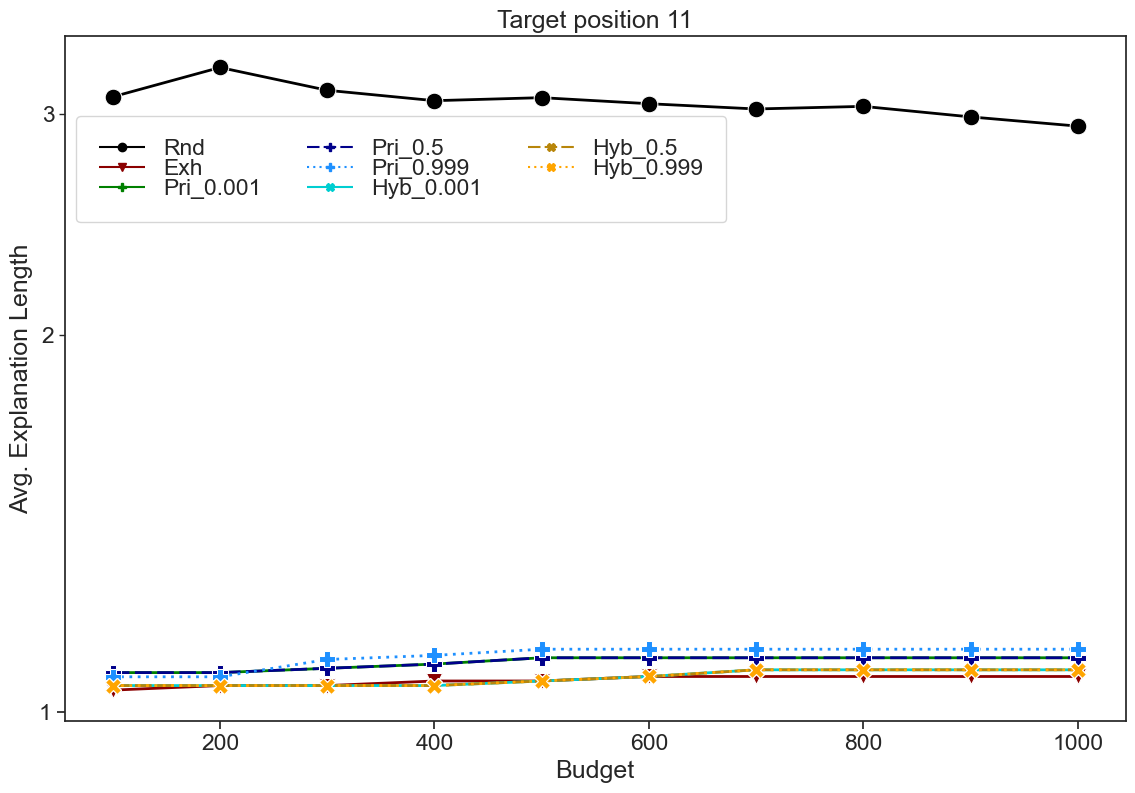

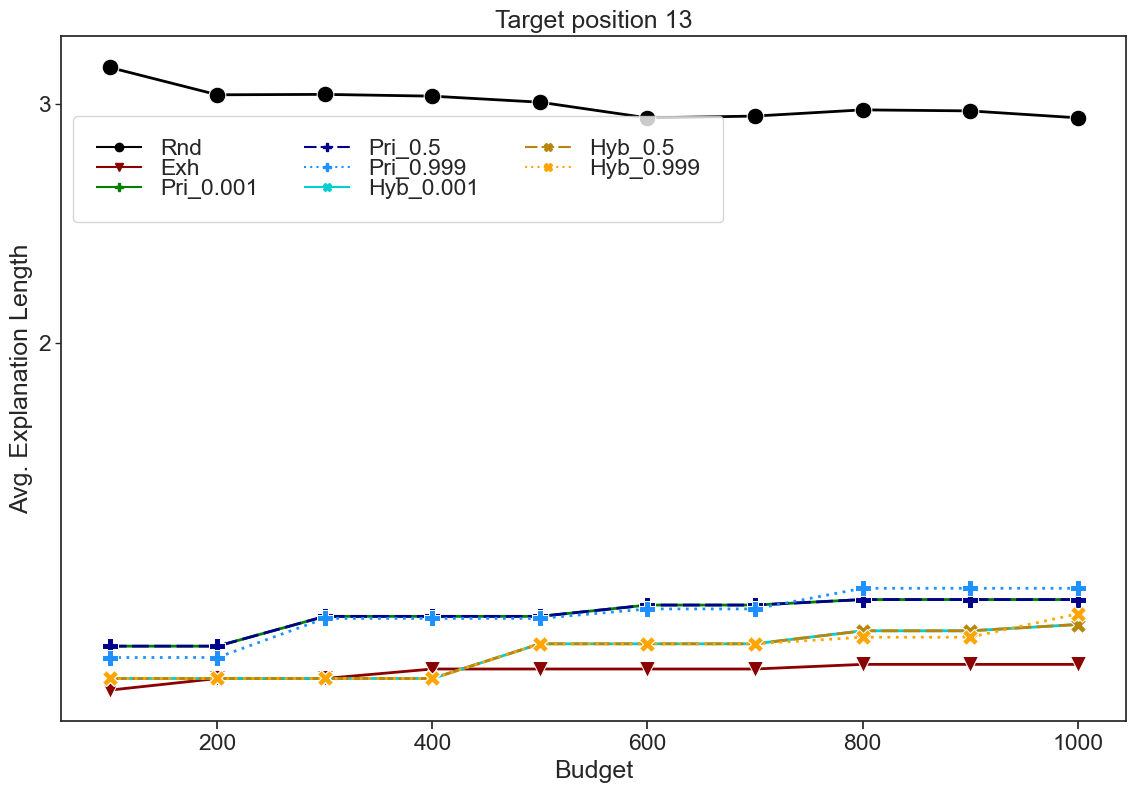

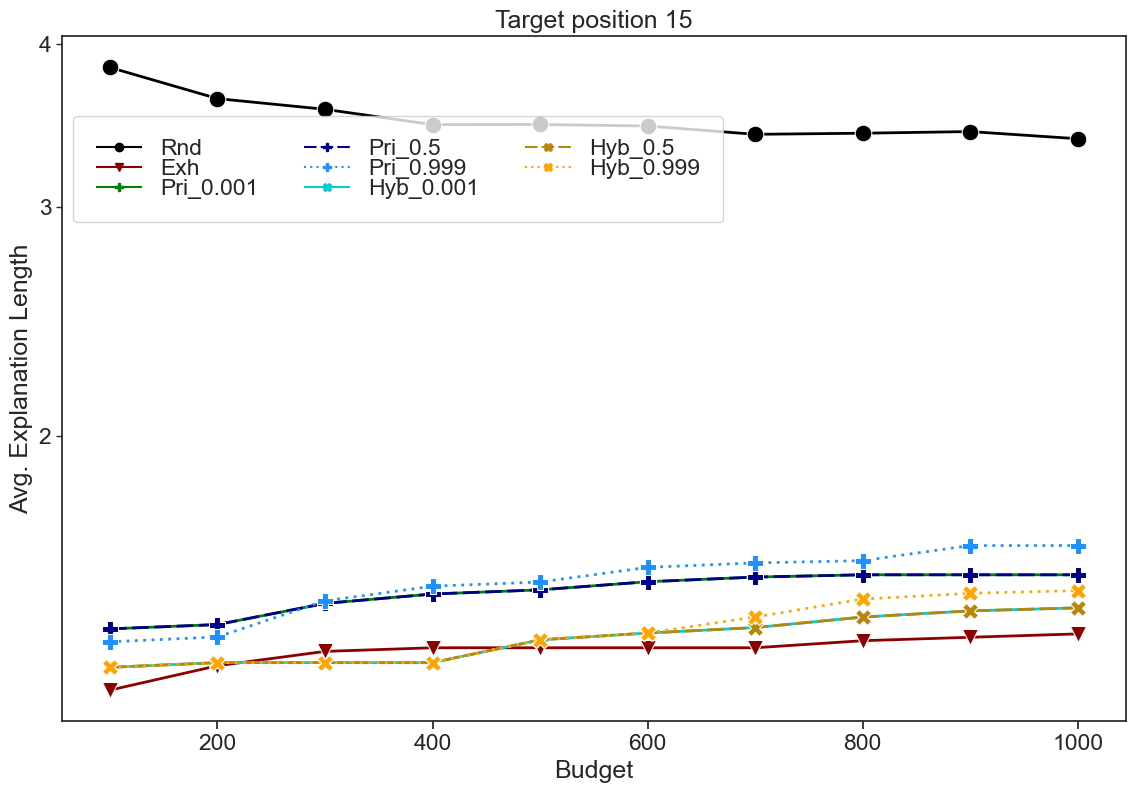

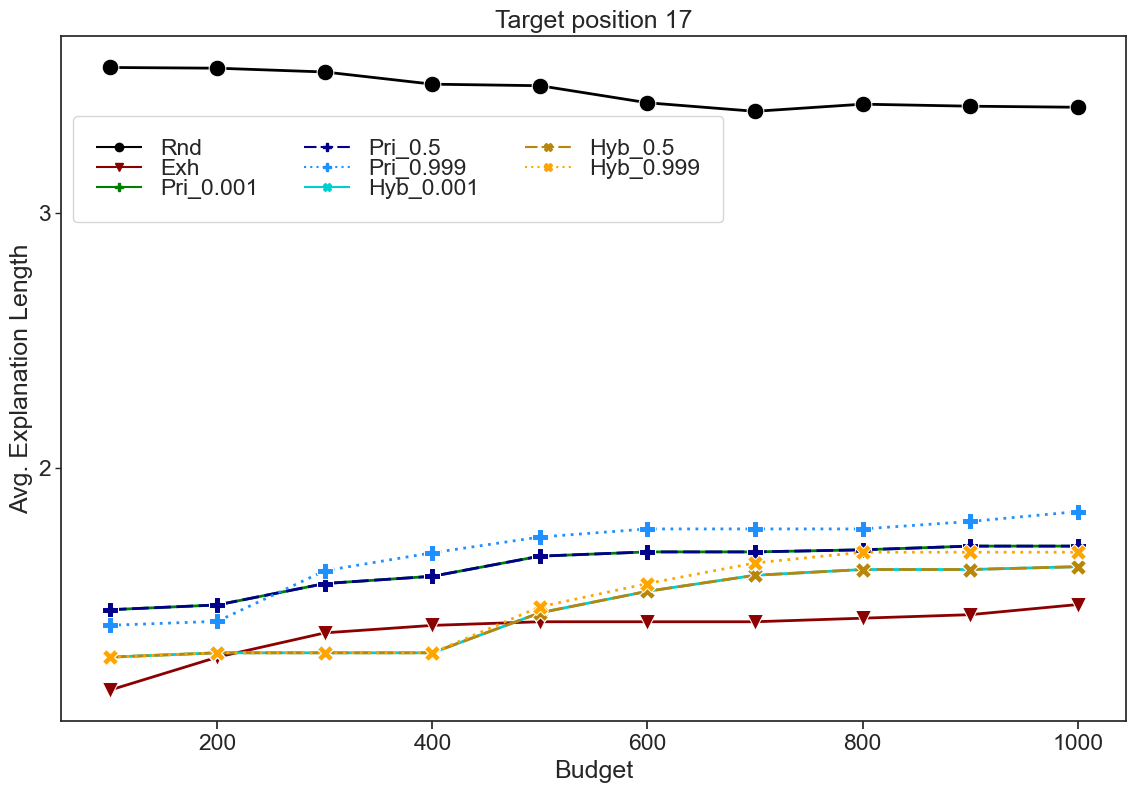

In [46]:
# Loop through each position and create individual line plots
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="card_mean", hue="method", style='method',
        palette=custom_palette,
        markers=custom_markers, markersize=12, lw=2, ls='solid', dashes=custom_dashes[:len(ddf2['method'].unique())]
    )

    # Set the y-axis to logarithmic scale
    g.set(yscale='log')

    # Set formatting for y-axis labels
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=3)

    # Replace legend labels with new labels
    #This part of the code has been adapted to not consider BFS strategy
    new_labels = ['Rnd', 'Exh', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    # new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set labels for x-axis and y-axis, and title for the plot
    ax.set(xlabel="Budget", ylabel="Avg. Explanation Length")
    ax.set_title(f'Target position {p}')

    # Adjust layout and save the plot as a PDF file
    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"avg_card_to_thres_pos_{p}.pdf"), dpi=300)

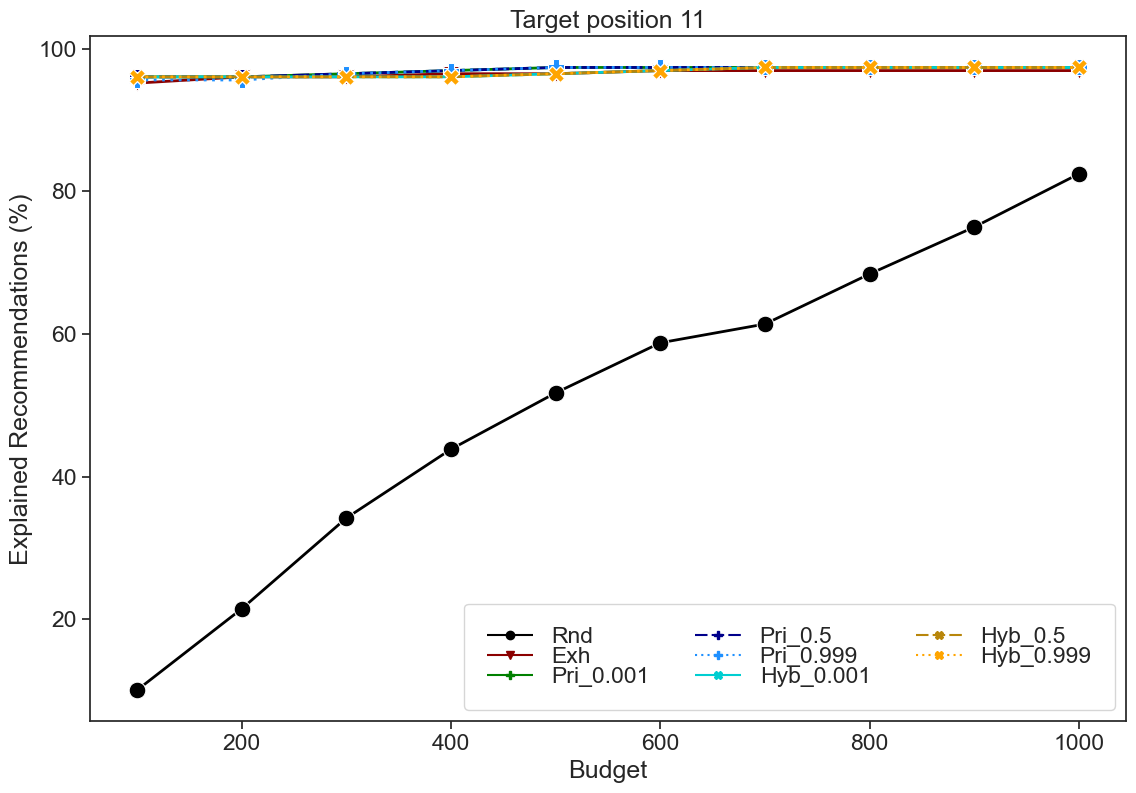

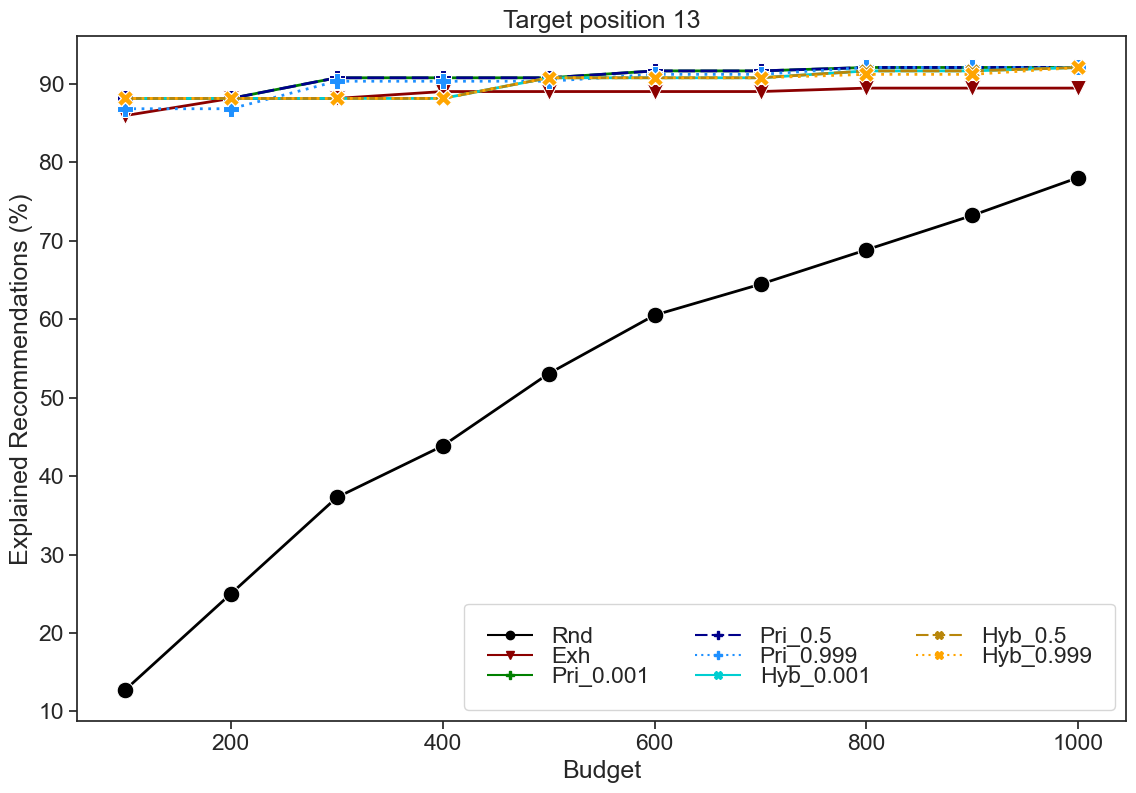

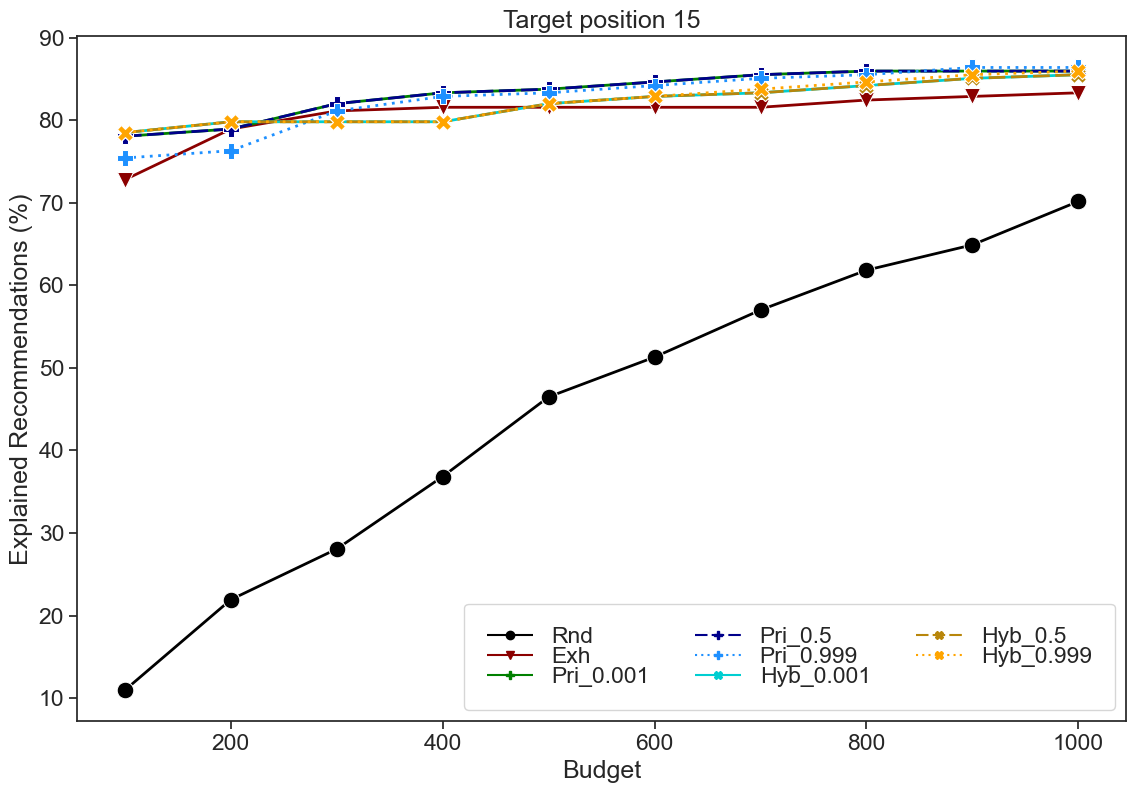

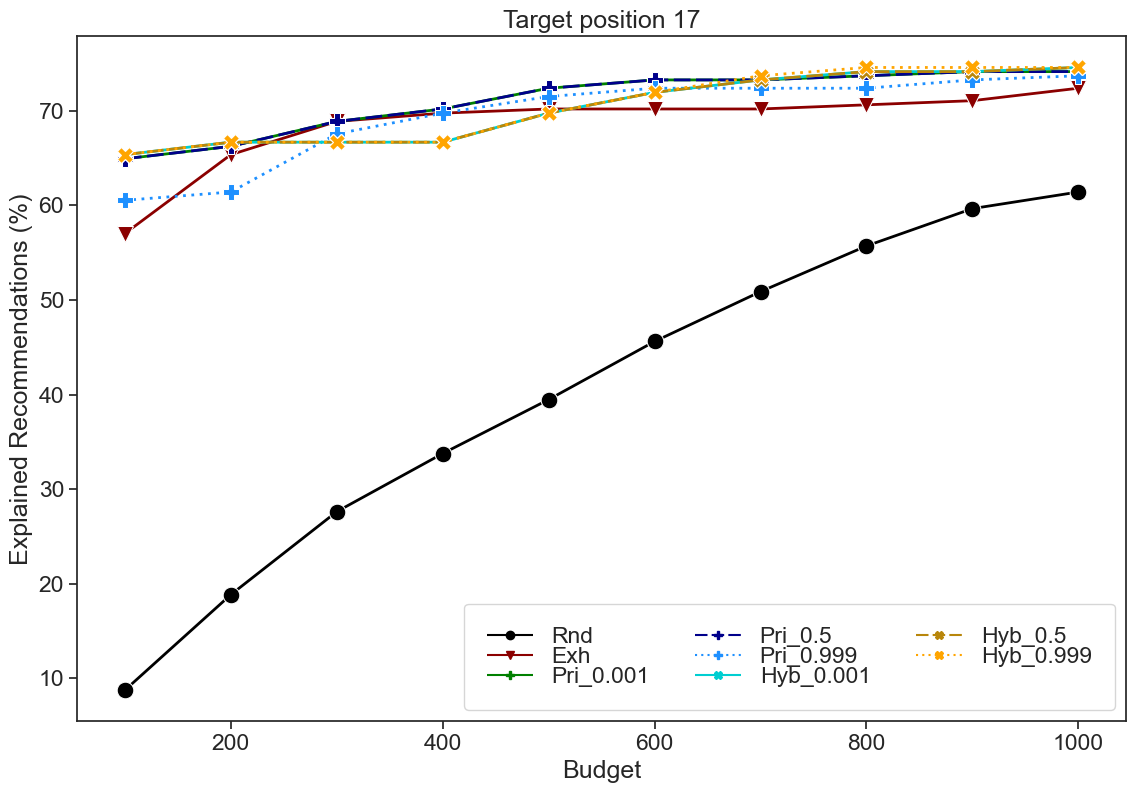

In [47]:
# Loop through target positions and create line plots for the percentage of users against budget thresholds

# Iterate over target positions and their corresponding groups in the DataFrame
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3)

    # Replace legend labels with new labels
    #This part of the code has been adapted to not consider BFS strategy
    new_labels = ['Rnd', 'Exh', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    # new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Budget", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"users_percent_to_thres_pos_{p}.pdf"), dpi=300)

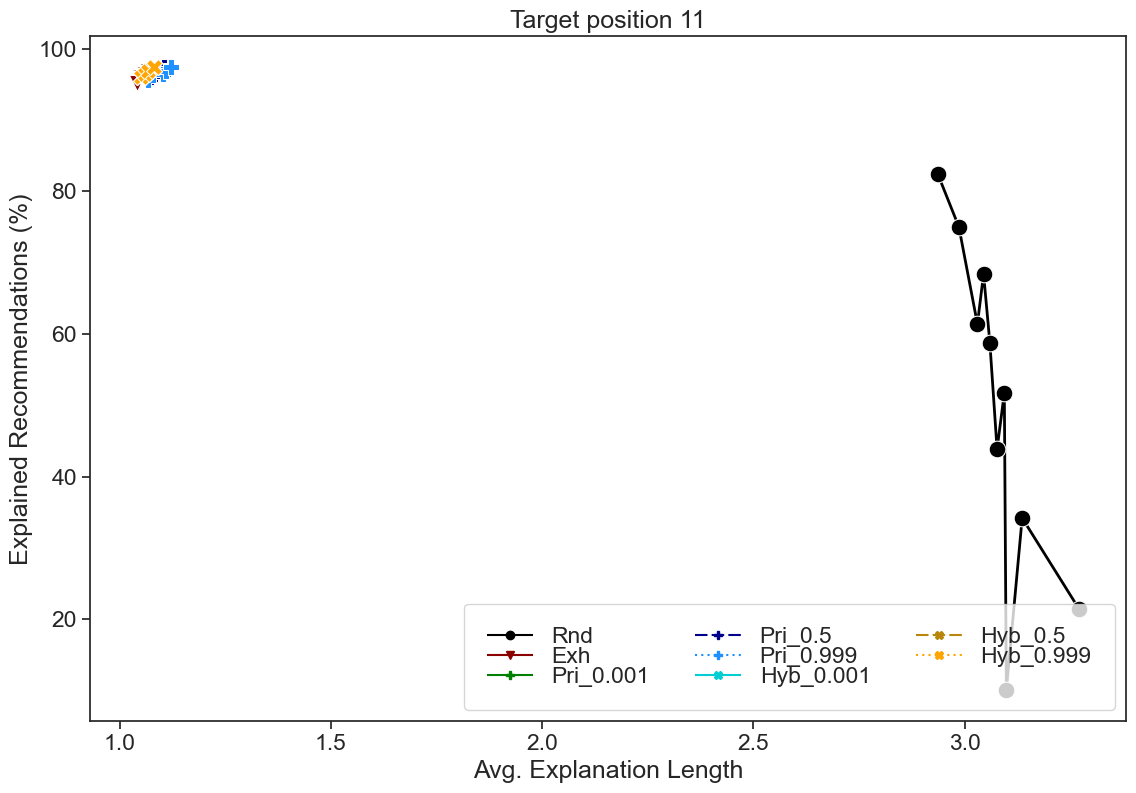

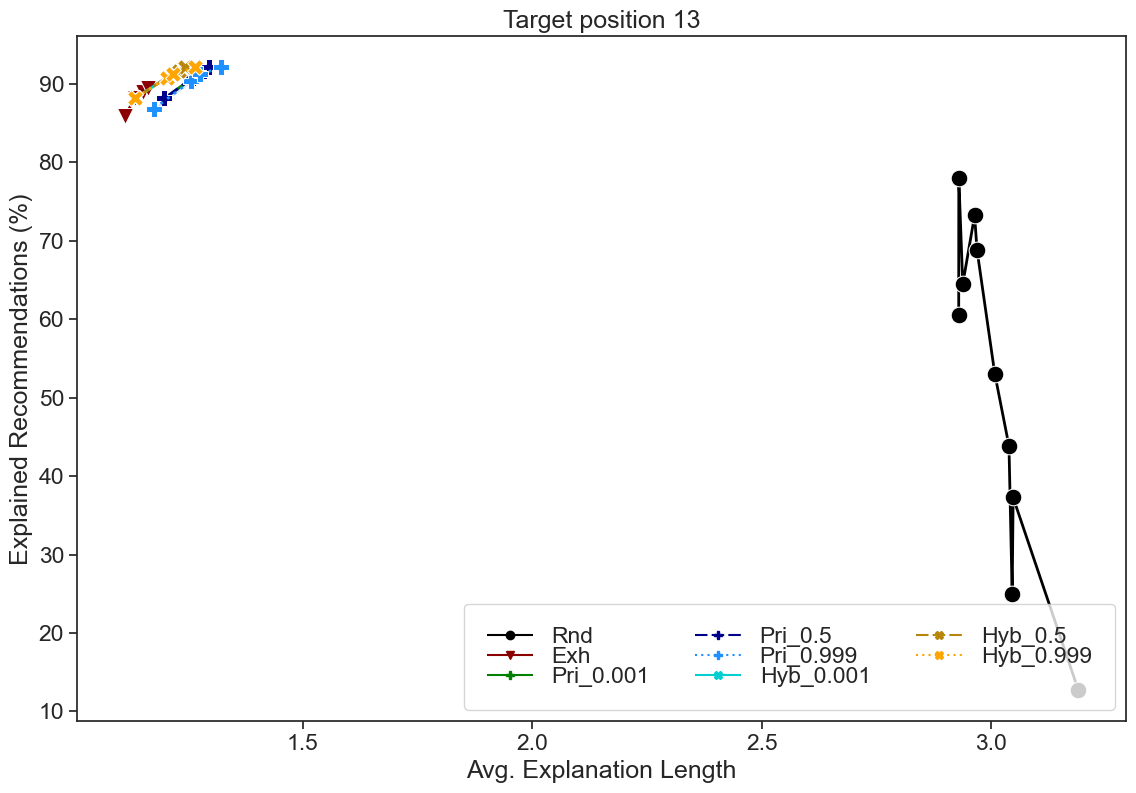

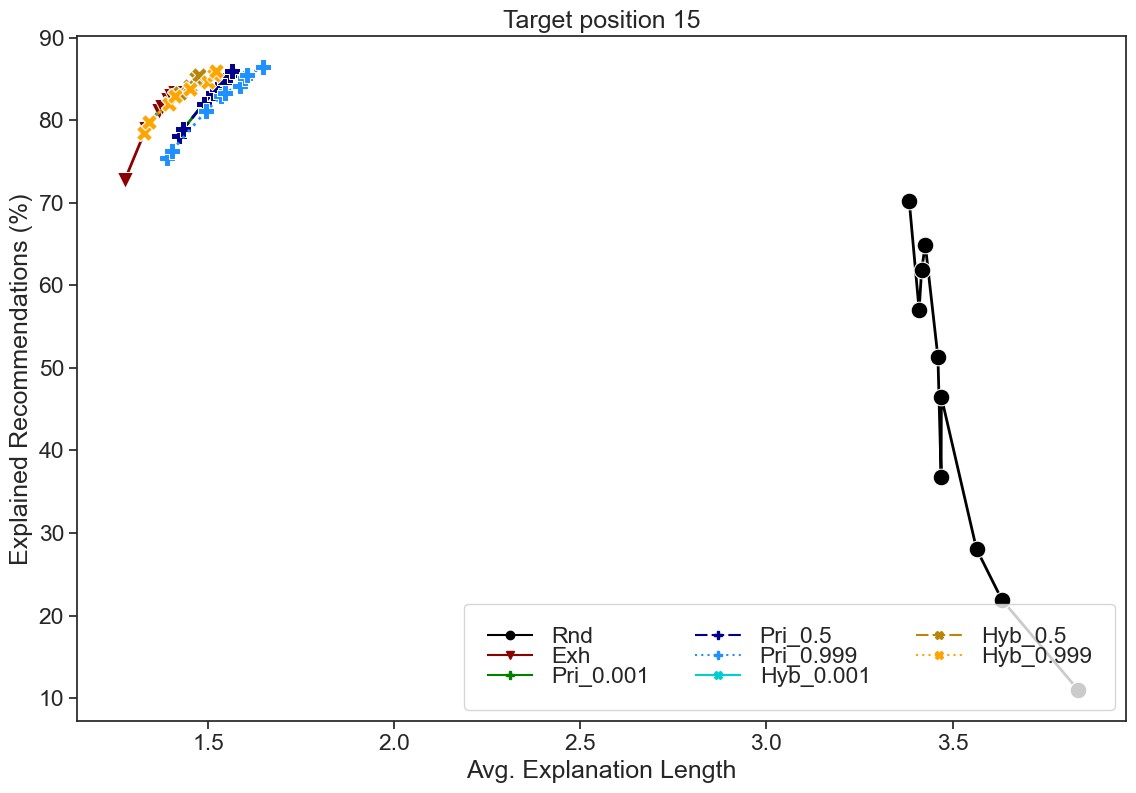

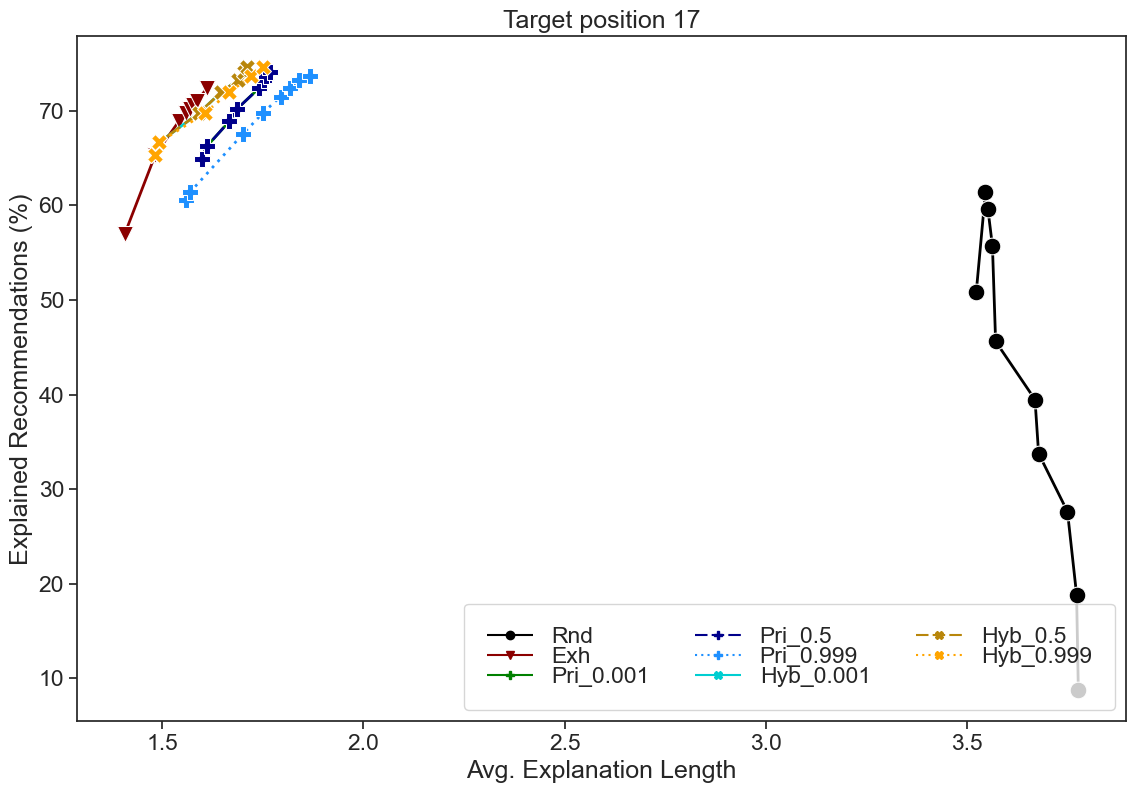

In [48]:
# Loop through target positions and create line plots for the percentage of users against budget thresholds

# Iterate over target positions and their corresponding groups in the DataFrame
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="card_mean", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3)

    # Replace legend labels with new labels
    #This part of the code has been adapted to not consider BFS strategy
    new_labels = ['Rnd', 'Exh', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    # new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Avg. Explanation Length", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"explained_percent_to_length_pos_{p}.pdf"), dpi=300)

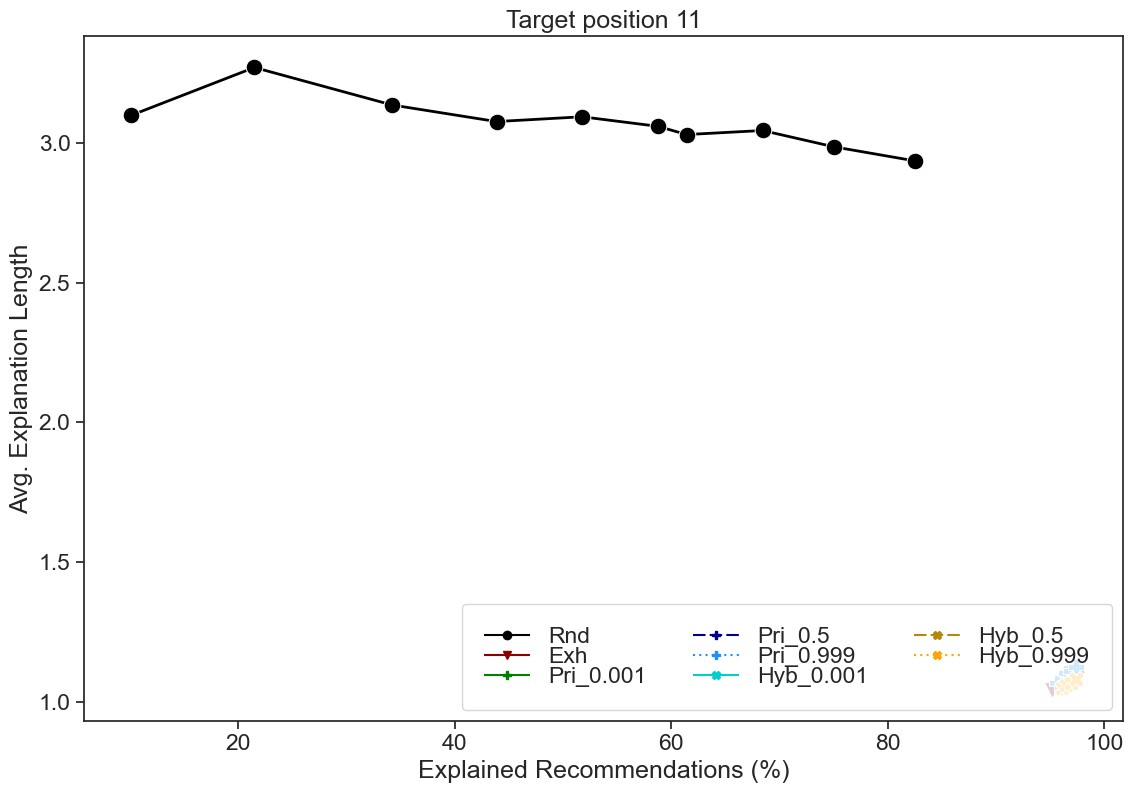

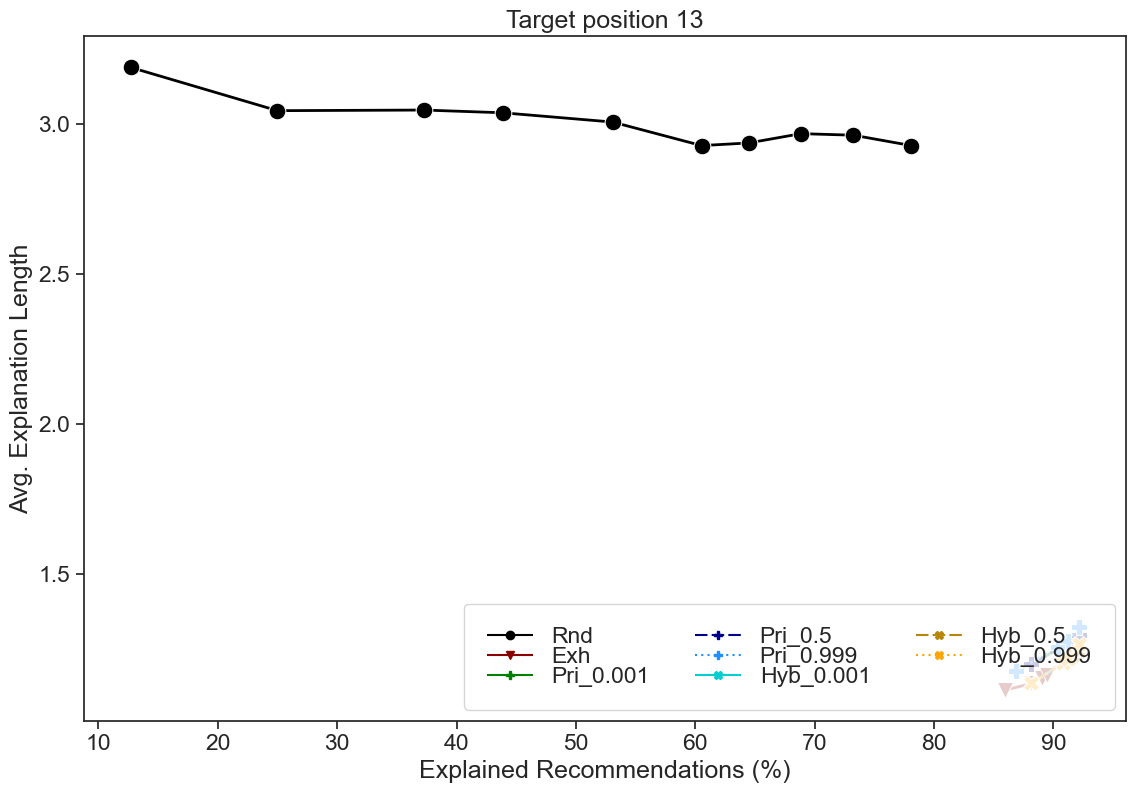

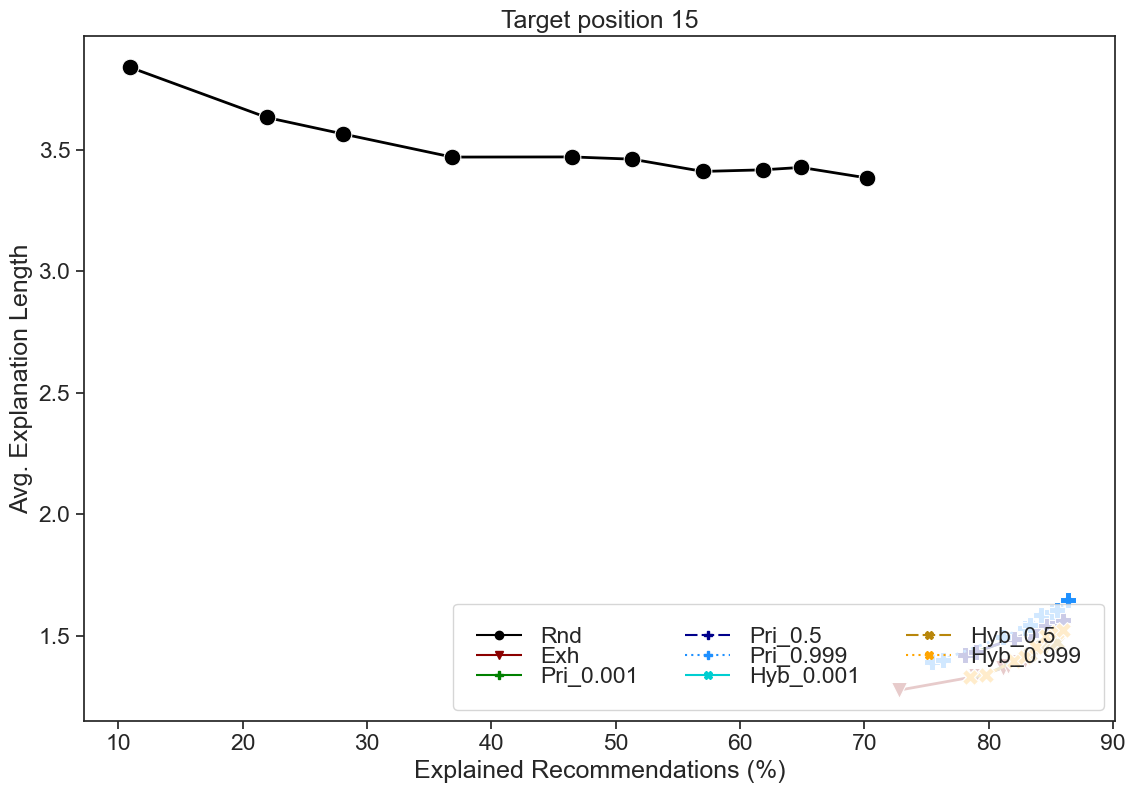

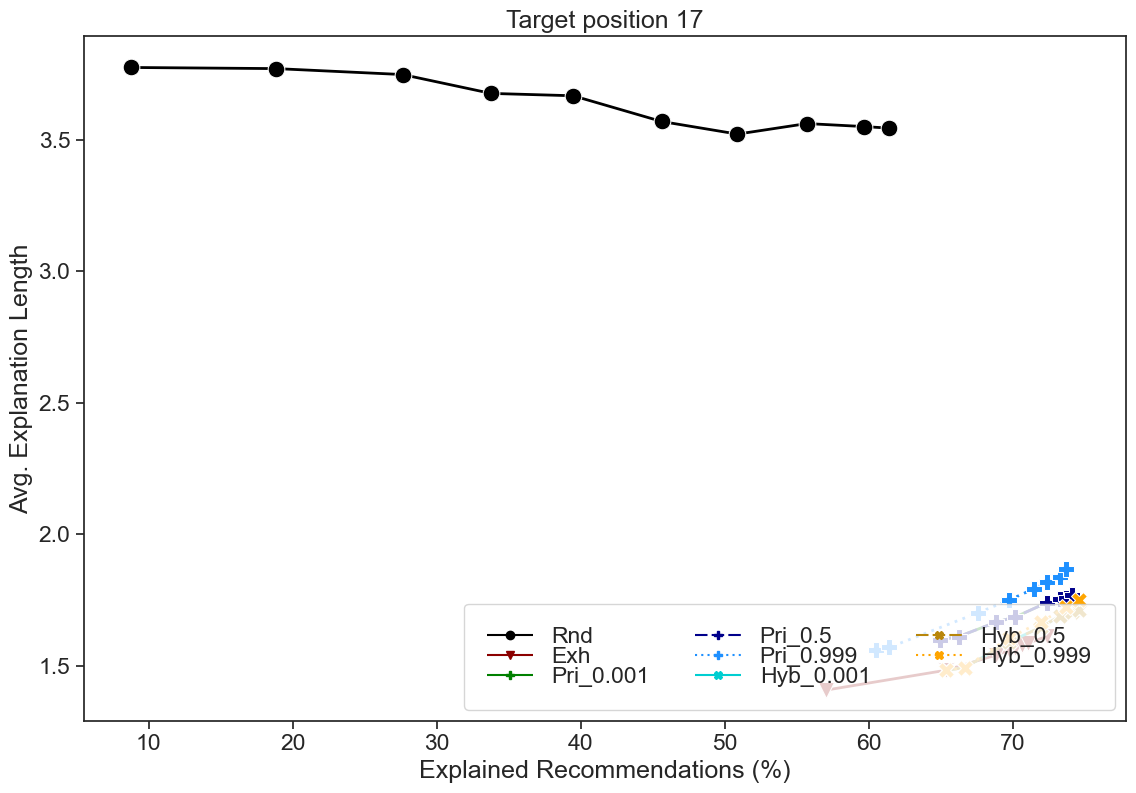

In [49]:
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="%users", y="card_mean", hue="method", style='method',  # Inverser x et y
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3)

    # Replace legend labels with new labels
    #This part of the code has been adapted to not consider BFS strategy
    new_labels = ['Rnd', 'Exh', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    # new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Explained Recommendations (%)", ylabel="Avg. Explanation Length")  # Inverser les étiquettes
    ax.set_title(f'Target position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"length_to_explained_percent_{p}.pdf"), dpi=300)


In [22]:
# Step 1: Print unique methods and custom markers side by side
unique_methods = ddf3['method'].unique()
print("Methods:", unique_methods)
print("Custom Markers:", custom_markers)

# Step 2: Create a mapping of methods to markers
method_marker_mapping = list(zip(unique_methods, custom_markers))
print("Method to Marker Mapping:", method_marker_mapping)


Methods: ['random_0' 'brute_force_0' 'bfs_0' 'bidirectional_001_0'
 'bidirectional_5_0' 'bidirectional_999_0' 'combo_001_0' 'combo_5_0'
 'combo_999_0']
Custom Markers: ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
Method to Marker Mapping: [('random_0', 'o'), ('brute_force_0', 'v'), ('bfs_0', '^'), ('bidirectional_001_0', 'P'), ('bidirectional_5_0', 'P'), ('bidirectional_999_0', 'P'), ('combo_001_0', 'X'), ('combo_5_0', 'X'), ('combo_999_0', 'X')]


In [23]:
custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

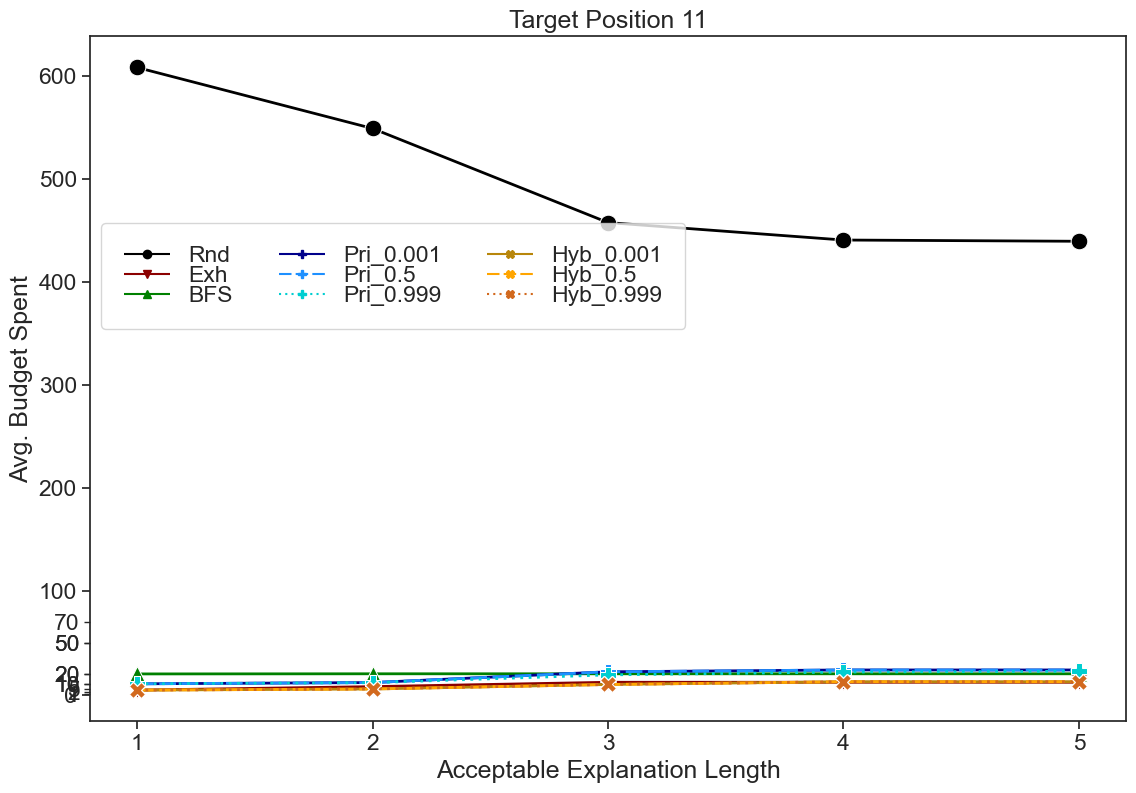

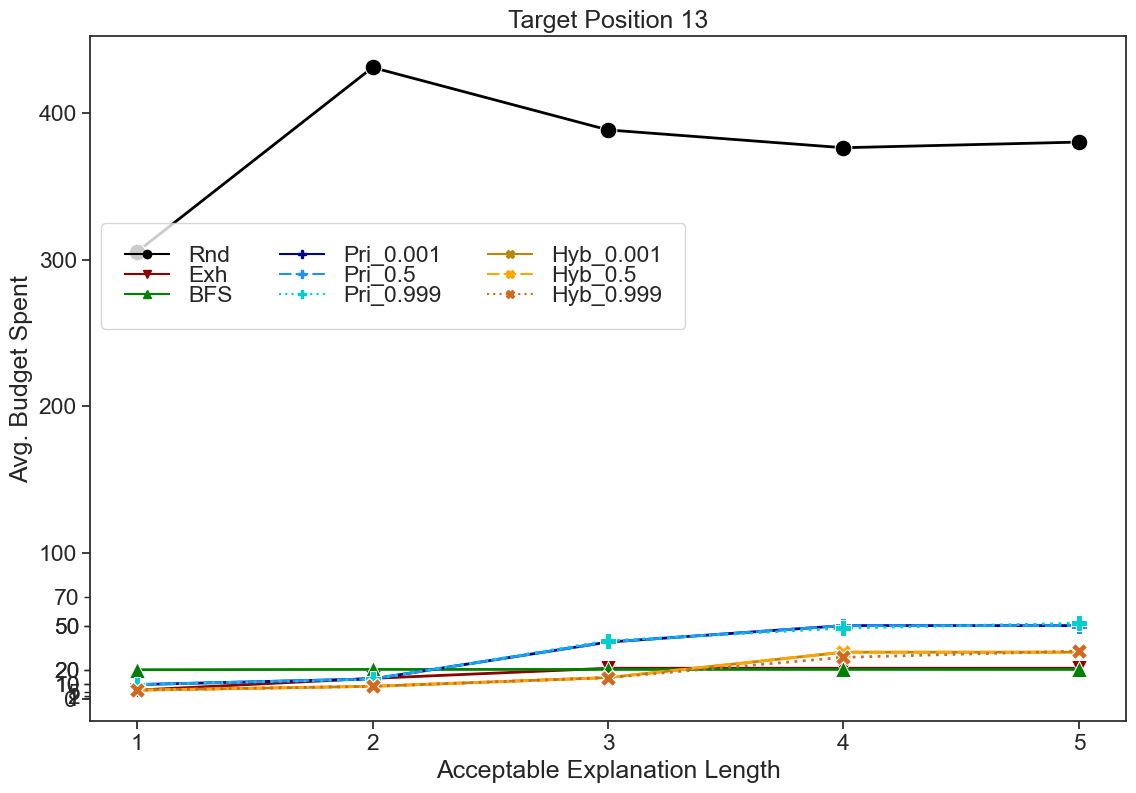

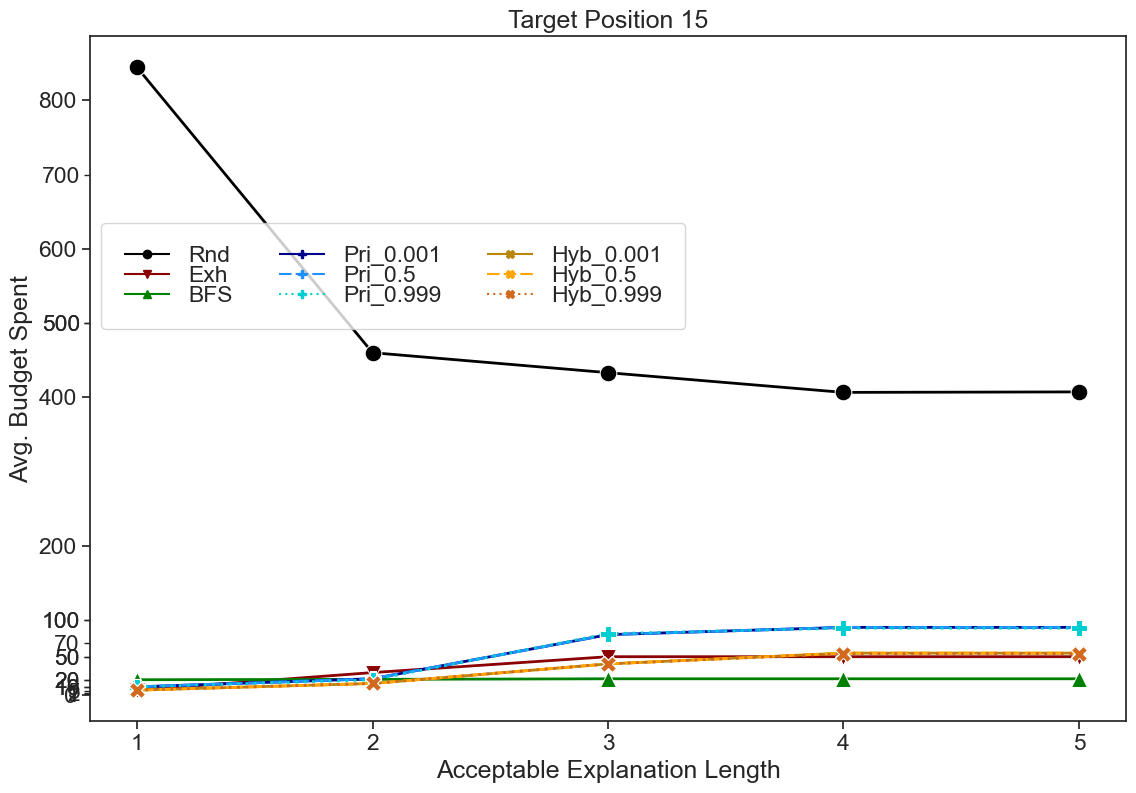

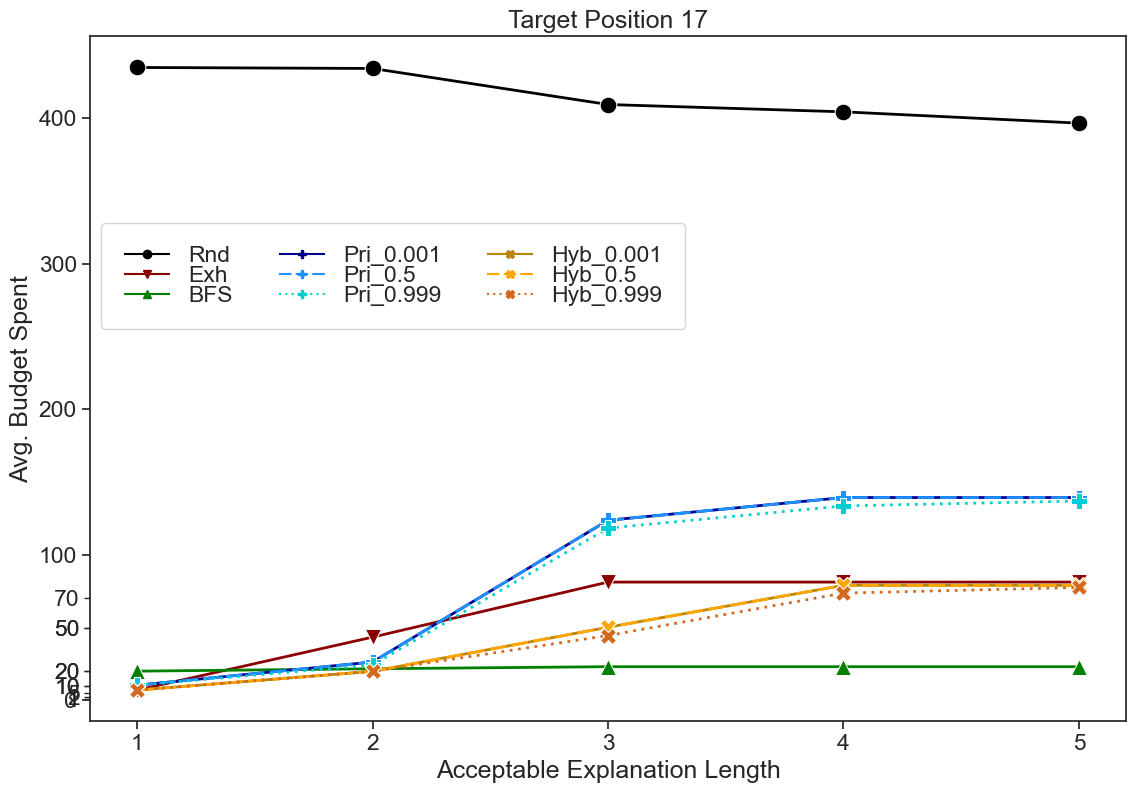

In [24]:
# Loop through target positions and create line plots for average budget spent against acceptable explanation length

# Iterate over target positions and their corresponding groups in the DataFrame
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf3[(ddf3['pos']==p)],
        x="cardinality", y="avg_budget", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

    # Set minor locator and formatter for y-axis
    locmin = mticker.LogLocator(base=10, subs=[10, 20, 50, 100, 200, 500, 700], numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    # Set x-axis ticks
    ax.set_xticks(np.arange(1, 6, 1))

    # Uncomment the following line to add grid lines
    # plt.grid(True, which="both", ls="--", c='gray')

    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='center left', bbox_to_anchor=(0, 0.65), ncol=3)

    # Replace legend labels with new labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Acceptable Explanation Length", ylabel="Avg. Budget Spent")
    ax.set_title(f'Target Position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"avg_budget_to_card_pos_{p}.pdf"), dpi=300)

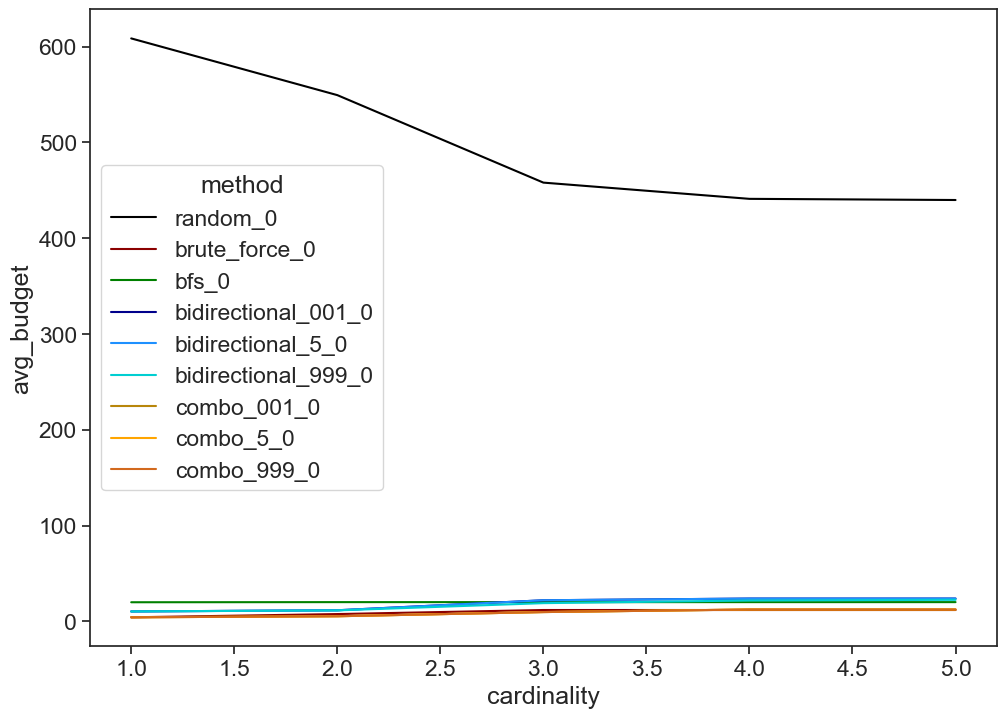

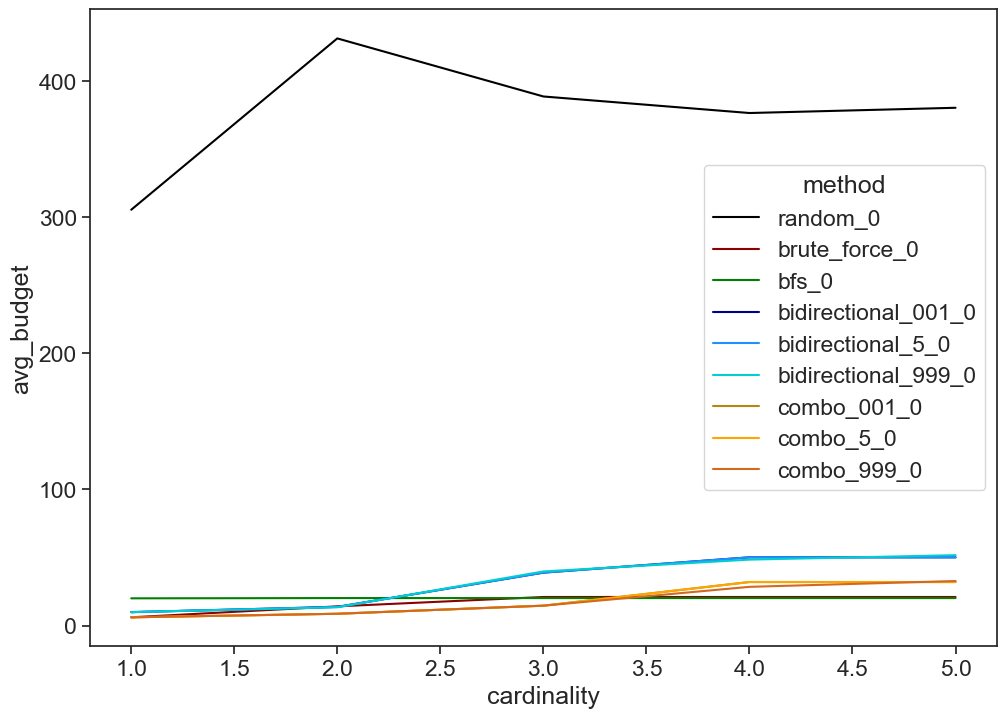

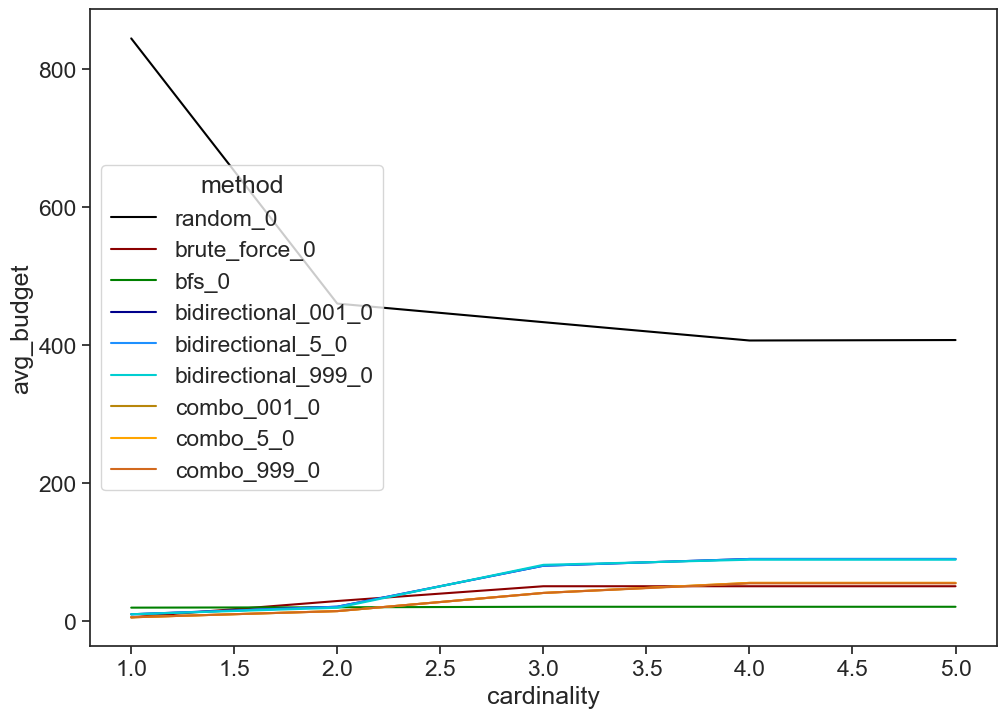

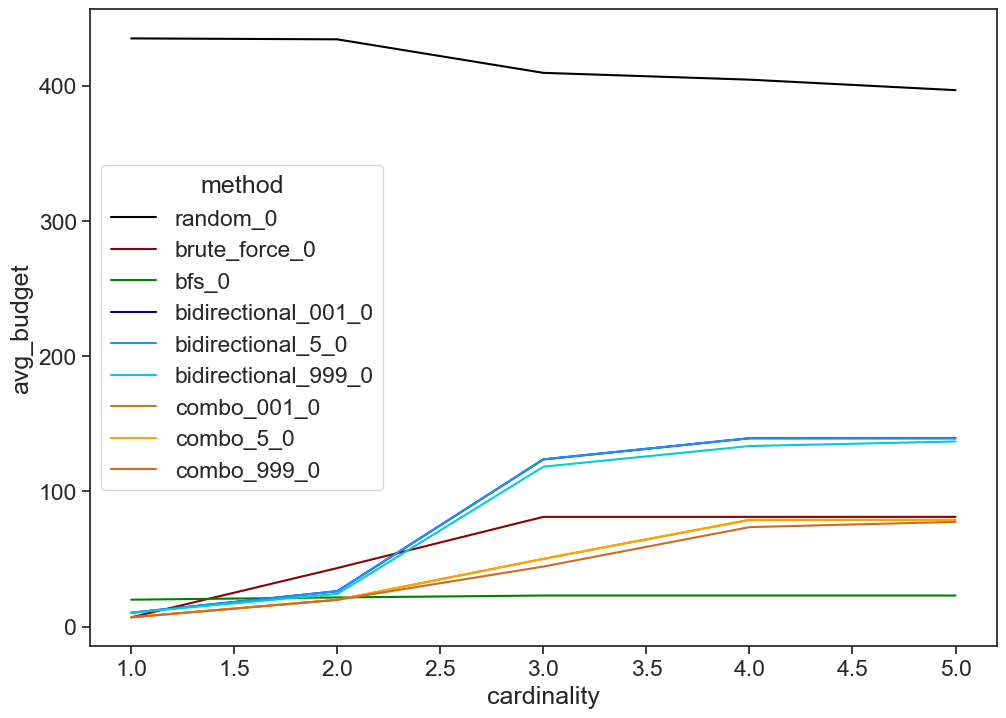

In [25]:
for p in ddf3['pos'].unique():
    fig, ax = plt.subplots(figsize=(11.7, 8.27))
    sns.lineplot(ax=ax, data=ddf3[ddf3['pos']==p], x="cardinality", y="avg_budget", hue="method")
    plt.show()


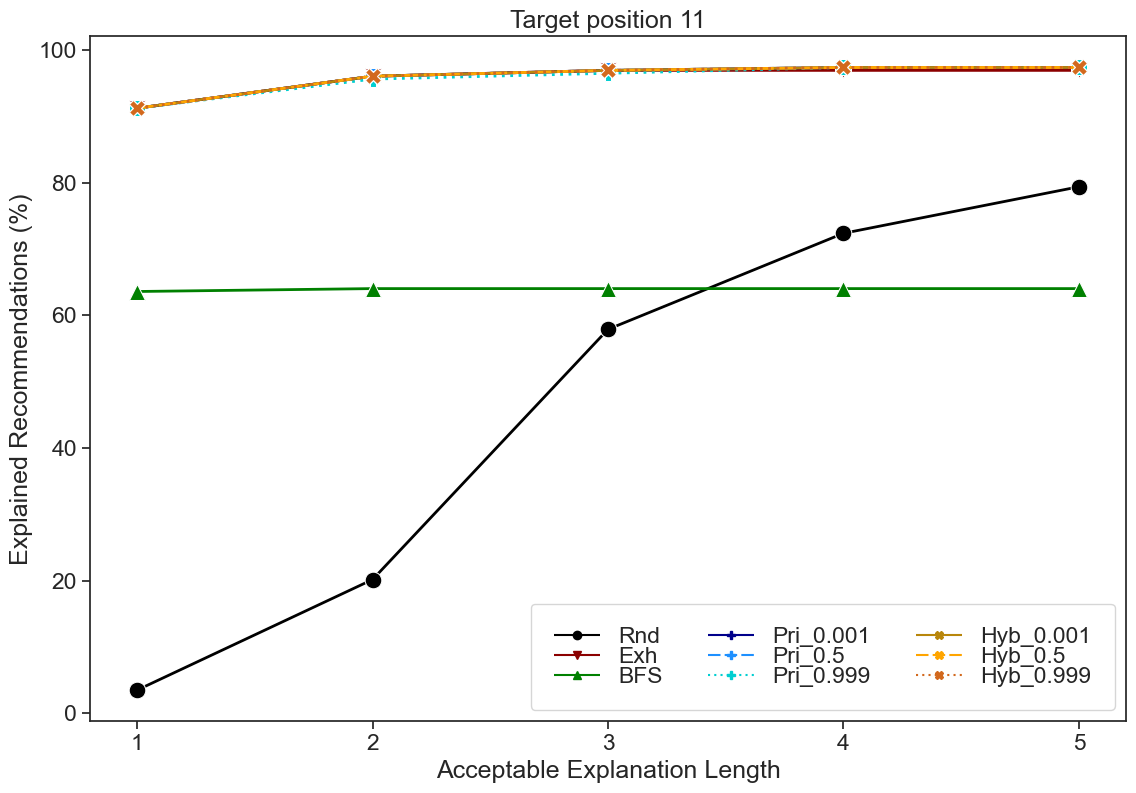

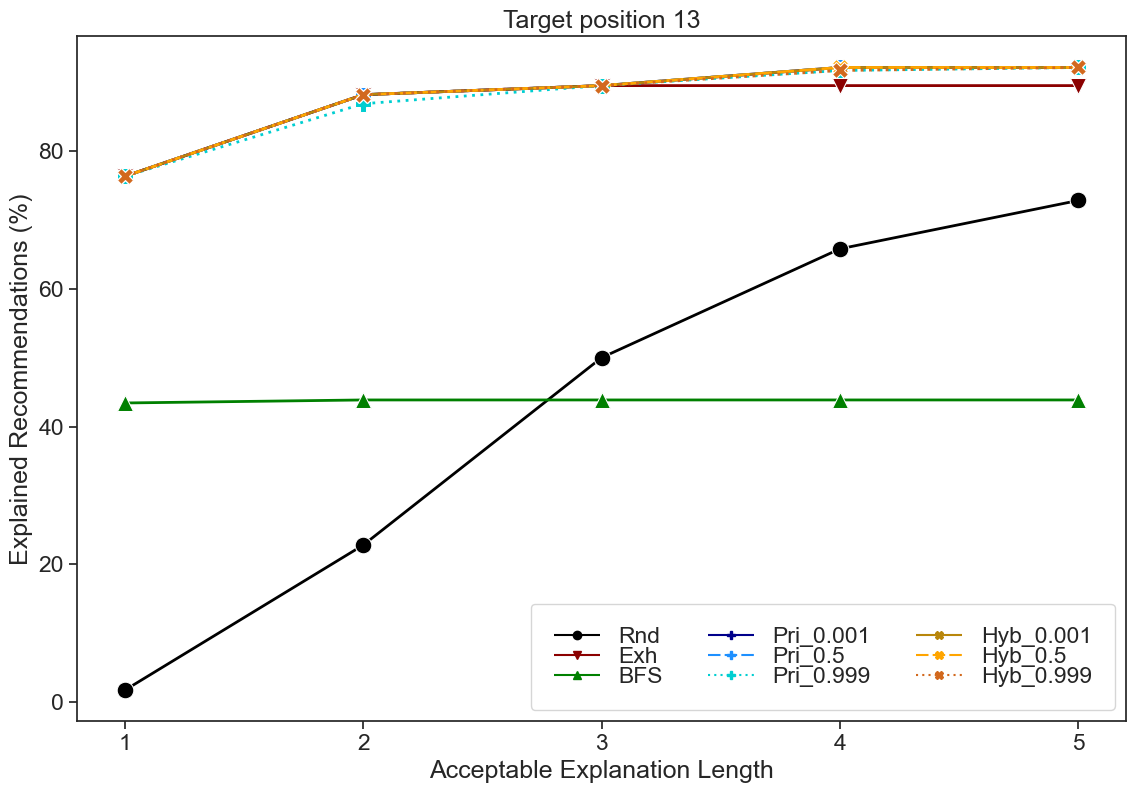

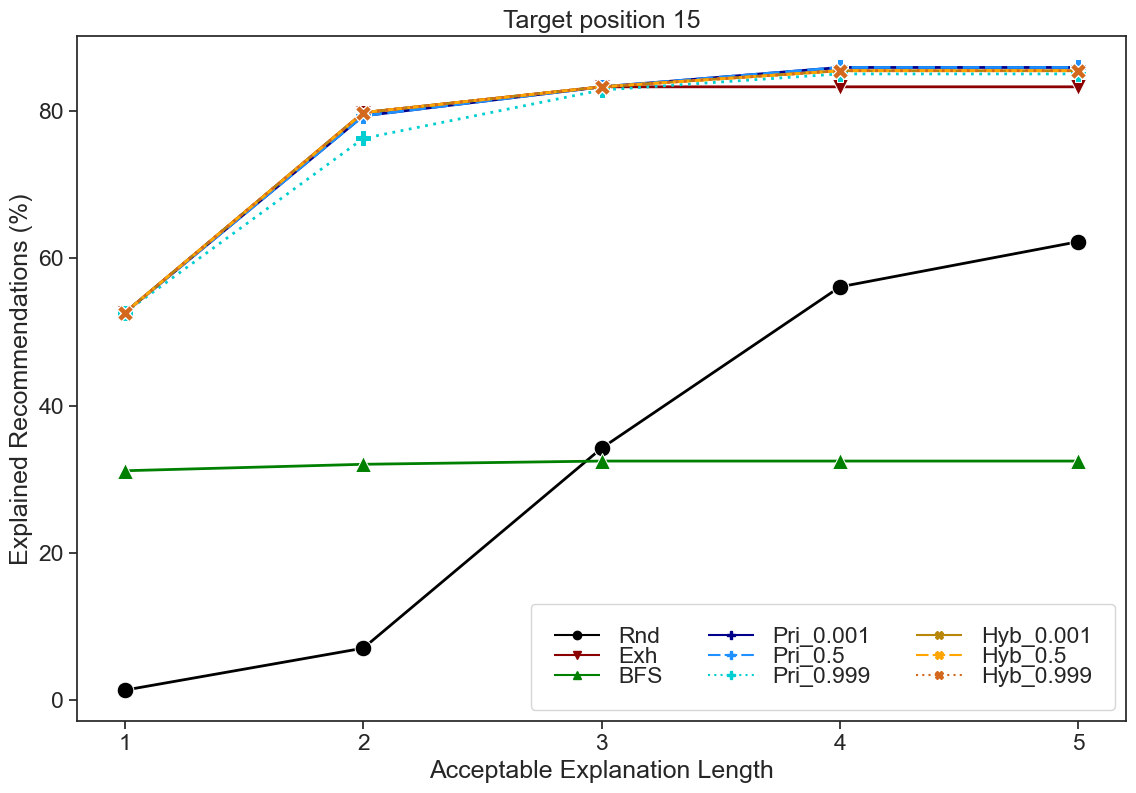

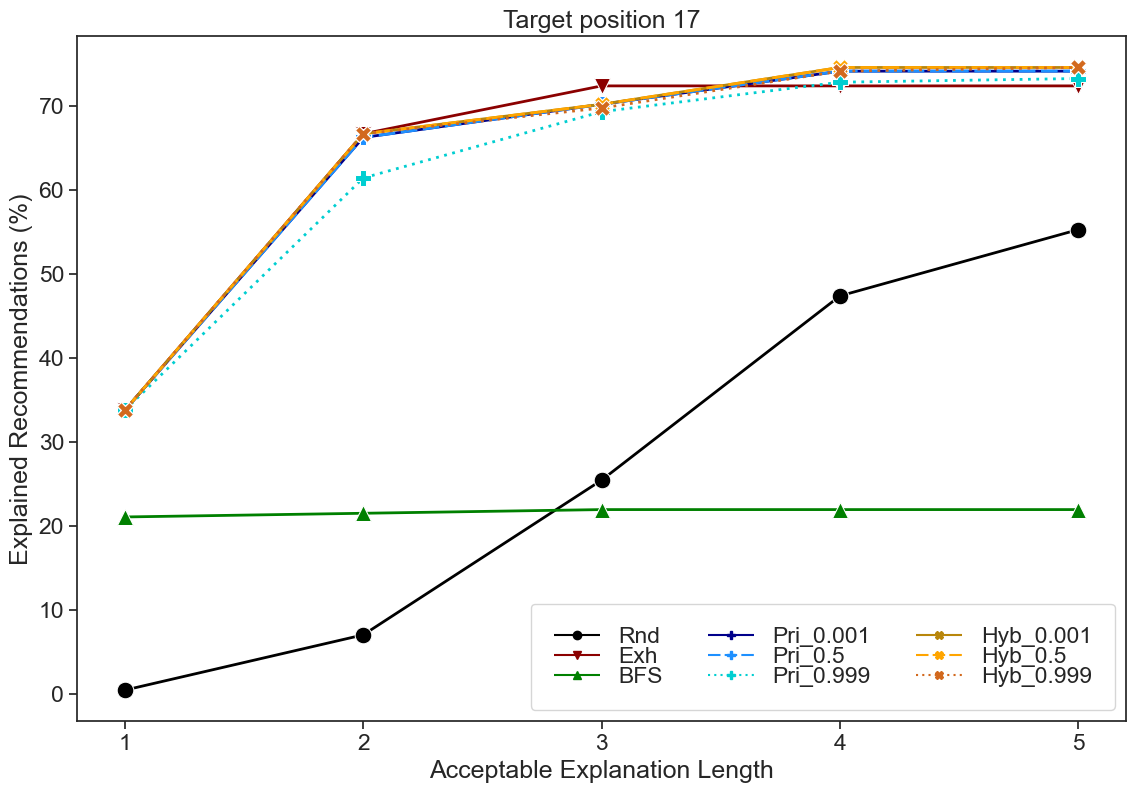

In [26]:
# Iterate over target positions and create line plots for percentage of users against acceptable explanation length

# Iterate over target positions and their corresponding groups in the DataFrame
for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(ax=ax,
        data=ddf3[(ddf3['pos']==p) ],
        x="cardinality", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

    ax.set_xticks(np.arange(1, 6, 1))


    # Customize the legend
    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3)

    # Replace legend labels with new labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels):
        t.set_text(l)

    # Set axis labels and title
    ax.set(xlabel="Acceptable Explanation Length", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    # Adjust layout for better visualization
    fig.tight_layout()

    # Save the plot as a PDF file in the specified plots folder
    plt.savefig(os.path.join(plots_folder, f"users_percent_to_card_pos_{p}.pdf"), dpi=300)

# Amazon

## Load data

In [ ]:
## uncomment the following lines if you want to run the various strategies in budget_strategies
# implemented_strategies = os.path.join(base_dir, 'budget_strategies.ipynb')
# %run $implemented_strategies

%store -r amazon_random_cfs
%store -r amazon_brute_force_cfs

%store -r amazon_bfs_yloss_cfs
# %store -r dfs_yloss_cfs
# %store -r bestfs_yloss_cfs

%store -r amazon_bidirectional_cfs
%store -r amazon_combo_cfs

## Prepare data

In [ ]:
from collections import Counter


# cnt = dict.fromkeys(most_sim_cfs.keys())
# no_target_achieved_cases = dict.fromkeys(most_sim_cfs.keys())
cnt = defaultdict(dict)
no_target_achieved_cases = defaultdict(list)
strs_prefix = 'amazon_'

for i in range(1):
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[0]}_cfs')[i],
        cnt, no_target_achieved_cases, f'random_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[1]}_cfs')[i],
        cnt, no_target_achieved_cases, f'brute_force_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[2]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bfs_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i],
        cnt, no_target_achieved_cases, f'bidirectional_001_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'bidirectional_5_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[3]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'bidirectional_999_{i}')

    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i],
        cnt, no_target_achieved_cases, f'combo_001_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 1],
        cnt, no_target_achieved_cases, f'combo_5_{i}')
    cnt, no_target_achieved_cases = convert_res_to_lists(
        getattr(current_module, f'{strs_prefix}{Strategies.stypes[4]}_cfs')[i + 2],
        cnt, no_target_achieved_cases, f'combo_999_{i}')

In [ ]:
methods_supported = ['Brute_Force', 'Random', 'BFS'] + \
    [f'BiDirectional_{m}' for m in ['001', '5', '999']] + \
    [f'Combo_{m}' for m in ['001', '5', '999']]

strategies = [('init', 2), ('best', 3)]
custom_range = [9, 29]
target_pos = list(cnt.keys())
cnames = ['user_id', 'method', 'pos', 'budget', 'init_budget', 'best_budget', 'cardinality', 'cfs_orig', 'cfs']

rows, cols = 5, 1

tmp_dfs = []
for col in range(cols):
    for pos, row in zip(target_pos, range(rows)):

        tmp_dfs.append(pd.DataFrame.from_records(list(
            itertools.chain(*(
                zip(v[6], itertools.repeat(k), itertools.repeat(pos), v[i], v[2], v[3],
                    itertools.repeat(i - custom_range[0] + 1), v[7], v[8])
                for k, v in cnt[pos].items() if f'_{col}' in k and k.rsplit('_', 1)[0] in map(lambda x: x.lower(), methods_supported)
                for i in range(custom_range[0], custom_range[1])
            ))), columns=cnames
        ))

df = pd.concat(tmp_dfs, ignore_index=True)

In [ ]:
idx = df.loc[(df['cfs_orig'] == df['cfs'])].duplicated(subset=['user_id', 'method', 'pos'], keep='last')
df.loc[(df['cfs_orig'] == df['cfs']) & ~idx, ['budget']] = df.loc[(df['cfs_orig'] == df['cfs']) & ~idx]['best_budget']

In [ ]:
# # 1st plot: %users per card
all_users = df['user_id'].nunique()

res = []
for i in range(1, 21):
    res.append(df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]
               .groupby(['method', 'pos'], sort=False)[['user_id', 'cfs']]
               .nunique()
               .reset_index())

ddf = pd.concat(res, ignore_index=True)
ddf['%users'] = (ddf['user_id'] / all_users) * 100

# 2nd plot: average budget
max_card = 5
init = 100
end = 1001
step = 100


res = []
for b in range(init, end, step):
    aggregated = df[(df['budget'] > 0) & (df['best_budget'] <= b)]\
        .groupby(['method', 'pos'], sort=False)\
        .agg(card_mean=('cfs', 'mean'), no_users=('user_id', 'nunique'))\
        .reset_index()
    aggregated['budget_thres'] = b
    aggregated['max_users'] = aggregated.groupby(['pos'])['no_users'].transform(max)
    res.append(aggregated)

ddf2 = pd.concat(res, ignore_index=True)
ddf2['%users'] = (ddf2['no_users'] / all_users) * 100
# ddf2['combined_means'] = ((ddf2['card_mean'] * ddf2['no_users']) + (20 * (ddf2['max_users'] - ddf2['no_users']))) / (ddf2['max_users'])
ddf2['combined_means'] = ddf2['card_mean']


# 3rd plot:
def aggf(data):
    users_grouping = data.groupby(['user_id']).apply(
        lambda d: d.loc[d['budget'] == d['budget'].max()]
    )

    return pd.Series(
        [users_grouping['budget'].mean(),
         users_grouping['user_id'].count()],
        ['avg_budget', 'no_users']
    )

res = []
for i in range(5, 0, -1):
    aggregated = df[(df['budget'] > 0) & (df['cardinality'] <= i) & (df['best_budget'] <= 1000)]\
        .groupby(['method', 'pos'], sort=False)\
        .apply(aggf)\
        .reset_index()
    aggregated['cardinality'] = i
    res.append(aggregated)

ddf3 = pd.concat(res, ignore_index=True)
ddf3['%users'] = (ddf3['no_users'] / all_users) * 100

## Plots

In [ ]:
import matplotlib.ticker as mticker


sns.set_theme(style="ticks", font_scale=1.5, )

# Create an array with the colors you want to use
# colors = ["#FF0B04", "#4374B3", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors = ['black', 'darkred', 'green', 'darkblue', 'dodgerblue', 'darkturquoise', 'darkgoldenrod', 'orange', 'chocolate']

# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))

# custom_markers = ['o', 'v', '^', 's', 'P', 'X', '<', '>', 'D', ]
custom_markers = ['o', 'v', '^', 'P', 'P', 'P', 'X', 'X', 'X']
custom_dashes = [(1, 0), (4, 0), (4, 0), (4, 0), (6, 2), (1, 2), (1, 0), (6, 2), (1, 2)]

In [ ]:
# Draw a nested barplot by species and sex
# g = sns.catplot(
#     data=ddf2[ddf2['pos']==3], kind="bar",
#     x="budget_thres", y='combined_means', hue="method",
#     ci=None, palette="dark", alpha=.8, height=6, aspect=4,
# )

# num_locations = len(ddf2.groupby('budget_thres').groups.keys())
# hatches = itertools.cycle(['//', '+', '-', 'x', '\\', '*', 'o', '.'])
# for i, bar in enumerate(g.ax.patches):
#     if i % num_locations == 0:
#         hatch = next(hatches)
#     bar.set_hatch(hatch)

# g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=False)

# g.despine(left=True)
# g.set_axis_labels("threshold", "cardinality average")
# g.legend.set_title("")

rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="card_mean", hue="method", style='method',
        palette=custom_palette,
        markers=custom_markers, markersize=12, lw=2, ls='solid', dashes=custom_dashes
    )

    g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#     ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#     ax.yaxis.get_major_formatter().set_scientific(False)
#     ax.yaxis.get_major_formatter().set_useOffset(False)

    # Turns on grid on the Axis.
#     plt.grid(True, which="both", ls="--", c='gray')
#     scientific_formatter = mticker.FuncFormatter()
#     ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=3,)

    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Budget", ylabel="Avg. Explanation Length")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}avg_card_to_thres_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf2[(ddf2['pos'] == p)],
        x="budget_thres", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2,
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)

    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Budget", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}users_percent_to_thres_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(
        ax=ax, data=ddf3[(ddf3['pos']==p)],
        x="cardinality", y="avg_budget", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )
    g.set(yscale='log')
    locmin = mticker.LogLocator(base=10, subs=[10, 20, 50, 100, 200, 500, 700], numticks=12)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.0f'))
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='center left', bbox_to_anchor=(0, 0.65), ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Avg. Budget Spent")
    ax.set_title(f'Target Position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}avg_budget_to_card_pos_{p}.pdf"), dpi=300)

In [ ]:
rows, cols = len(df.groupby('pos').groups.keys()), 1

for i, p in enumerate(df.groupby('pos').groups.keys()):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    g = sns.lineplot(ax=ax,
        data=ddf3[(ddf3['pos']==p) ],
        x="cardinality", y="%users", hue="method", style='method',
        palette=custom_palette, markers=custom_markers, markersize=12, dashes=custom_dashes, lw=2
    )

#     g.set(yscale='log')
#     locmin = mticker.LogLocator(base=10, subs=np.arange(0, 1, 0.1), numticks=12)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#     ax.yaxis.set_minor_formatter(mticker.NullFormatter())

    ax.set_xticks(np.arange(1, 6, 1))

#     plt.grid(True, which="both", ls="--", c='gray')

    lgnd = ax.legend(fancybox=True, frameon=True, labelspacing=0, borderpad=1, loc='lower right', ncol=3,)
    # replace labels
    new_labels = ['Rnd', 'Exh', 'BFS', 'Pri_0.001', 'Pri_0.5', 'Pri_0.999', 'Hyb_0.001', 'Hyb_0.5', 'Hyb_0.999']
    for t, l in zip(lgnd.texts, new_labels): t.set_text(l)

    ax.set(xlabel="Acceptable Explanation Length", ylabel="Explained Recommendations (%)")
    ax.set_title(f'Target position {p}')

    fig.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{strs_prefix}users_percent_to_card_pos_{p}.pdf"), dpi=300)